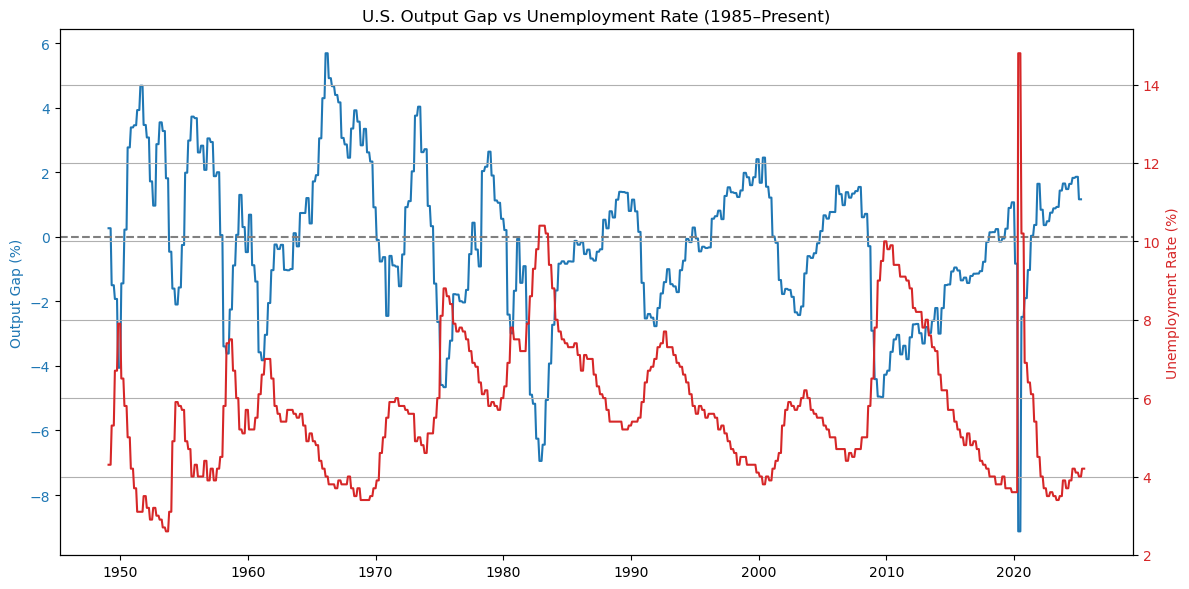

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

start_date = '1949-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# ‰∏ãËΩΩÊï∞ÊçÆ
actual_gdp = pdr.DataReader('GDPC1', 'fred', start_date, end_date)
potential_gdp = pdr.DataReader('GDPPOT', 'fred', start_date, end_date)
unrate = pdr.DataReader('UNRATE', 'fred', start_date, end_date)

# ÂêàÂπ∂Êï∞ÊçÆ
df = pd.concat([actual_gdp, potential_gdp], axis=1)
df.columns = ['Actual_GDP', 'Potential_GDP']
df['Output_Gap'] = 100 * (df['Actual_GDP'] - df['Potential_GDP']) / df['Potential_GDP']
df['Unemployment_Rate'] = unrate

# ËΩ¨Êç¢‰∏∫ÊúàÂ∫¶Êï∞ÊçÆ
df_monthly = df.resample('M').ffill()

# ÂèØËßÜÂåñÔºöÂèåËΩ¥Âõæ
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_monthly.index, df_monthly['Output_Gap'], label='Output Gap (%)', color='tab:blue')
ax1.set_ylabel('Output Gap (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.axhline(0, color='gray', linestyle='--')

ax2.plot(df_monthly.index, df_monthly['Unemployment_Rate'], label='Unemployment Rate (%)', color='tab:red')
ax2.set_ylabel('Unemployment Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('U.S. Output Gap vs Unemployment Rate (1985‚ÄìPresent)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


Okun‚Äôs Law
ÂΩìÂÆûÈôÖGDPÈ´ò‰∫éÊΩúÂú®GDPÔºàÊ≠£ÁöÑ‰∫ßÂá∫Áº∫Âè£ÔºâÊó∂ÔºåÁªèÊµéËøáÁÉ≠ÔºåÂ∞±‰∏ö‰∏äÂçáÔºåÂ§±‰∏öÁéá‰∏ãÈôç„ÄÇ
ÂΩìÂÆûÈôÖGDP‰Ωé‰∫éÊΩúÂú®GDPÔºàË¥üÁöÑ‰∫ßÂá∫Áº∫Âè£ÔºâÊó∂ÔºåÁªèÊµéÁñ≤ËΩØÔºåÂ∞±‰∏öÂáèÂ∞ëÔºåÂ§±‰∏öÁéá‰∏äÂçá„ÄÇ

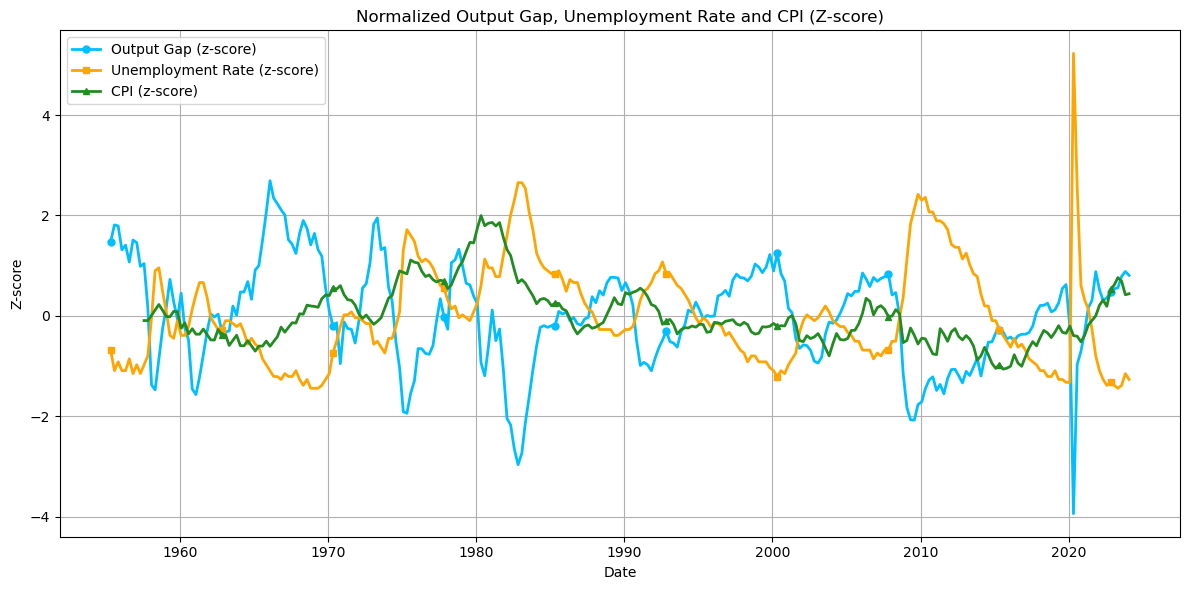

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr
from scipy.stats import zscore

start_date = '1949-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# ‰∏ãËΩΩÊï∞ÊçÆ
actual_gdp = pdr.DataReader('GDPC1', 'fred', start_date, end_date)
potential_gdp = pdr.DataReader('GDPPOT', 'fred', start_date, end_date)
unrate = pdr.DataReader('UNRATE', 'fred', start_date, end_date)
cpi = pdr.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)

# ÂêàÂπ∂Êï∞ÊçÆ
df = pd.concat([actual_gdp, potential_gdp, unrate, cpi], axis=1)
df.columns = ['Actual_GDP', 'Potential_GDP', 'Unemployment_Rate', 'CPI']
df['Output_Gap'] = 100 * (df['Actual_GDP'] - df['Potential_GDP']) / df['Potential_GDP']

# ËΩ¨‰∏∫ÊúàÂ∫¶Êï∞ÊçÆÔºåÁº∫Â§±ÂÄºÂêëÂâçÂ°´ÂÖÖ
df_monthly = df.resample('M').ffill().dropna()

# ÂØπ‰∏âÂàóÂÅö z-score Ê†áÂáÜÂåñ
df_monthly['Output_Gap_z'] = zscore(df_monthly['Output_Gap'])
df_monthly['Unemployment_Rate_z'] = zscore(df_monthly['Unemployment_Rate'])
df_monthly['CPI_z'] = zscore(df_monthly['CPI'])

# ÁîªÂõæ
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['Output_Gap_z'], label='Output Gap (z-score)',
         color='deepskyblue', linewidth=2, marker='o', markersize=5, markevery=30)
plt.plot(df_monthly.index, df_monthly['Unemployment_Rate_z'], label='Unemployment Rate (z-score)',
         color='orange', linewidth=2, marker='s', markersize=5, markevery=30)
window_size = 10
smoothed_series = df_monthly['CPI_z'].rolling(window=window_size).mean()
plt.plot(df_monthly.index, smoothed_series, label='CPI (z-score)',
         color='forestgreen', linewidth=2, marker='^', markersize=5, markevery=30)
# plt.plot(df_monthly.index, df_monthly['CPI_z'], label='CPI (z-score)',
#          color='forestgreen', linewidth=2, marker='^', markersize=5, markevery=30)

plt.title('Normalized Output Gap, Unemployment Rate and CPI (Z-score)')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


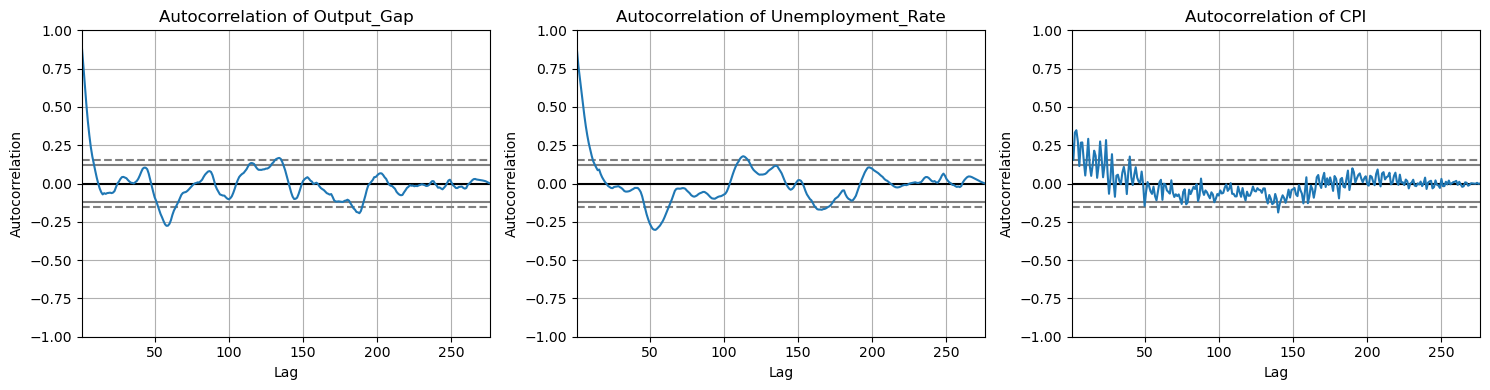

In [3]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15, 4))
for i, col in enumerate(['Output_Gap', 'Unemployment_Rate', 'CPI']):
    plt.subplot(1, 3, i+1)
    autocorrelation_plot(df_monthly[col])
    plt.title(f'Autocorrelation of {col}')
plt.tight_layout()
plt.show()


‰ΩøÁî®ÁöÑÊòØÊúàÂ∫¶Êï∞ÊçÆÔºåÊ®™ËΩ¥Ë°®Á§∫ÊªûÂêéÂá†Êúü

In [4]:
# ÊèêÂèñÈúÄË¶ÅÁöÑÂàó
macro_z = df_monthly[['Output_Gap_z', 'Unemployment_Rate_z', 'CPI_z']]

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
corr_matrix = macro_z.corr(method='pearson')

# ÊâìÂç∞ÁªìÊûú
print(corr_matrix)


                     Output_Gap_z  Unemployment_Rate_z     CPI_z
Output_Gap_z             1.000000            -0.821206  0.148171
Unemployment_Rate_z     -0.821206             1.000000 -0.062630
CPI_z                    0.148171            -0.062630  1.000000


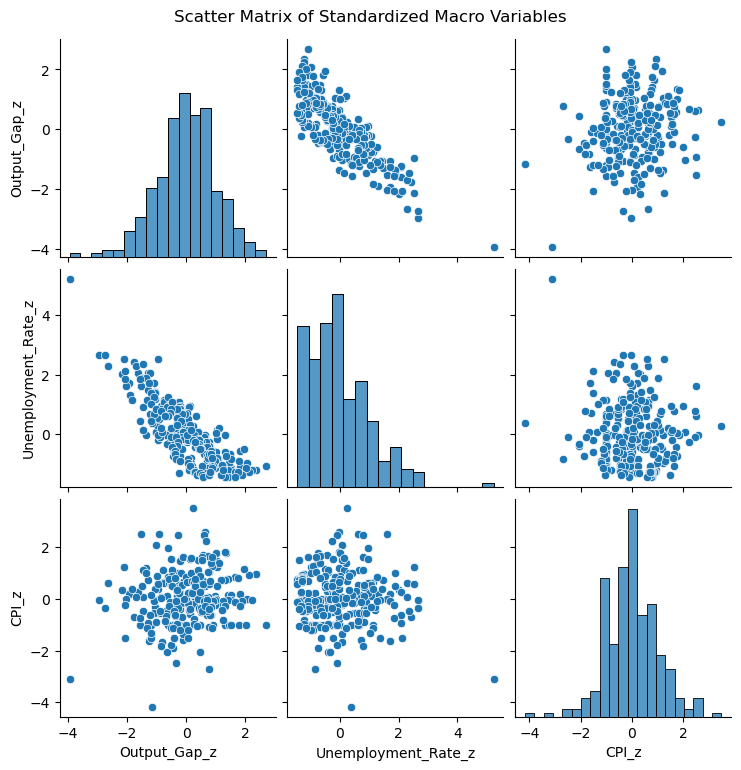

In [5]:
import seaborn as sns

sns.pairplot(macro_z)
plt.suptitle("Scatter Matrix of Standardized Macro Variables", y=1.02)
plt.show()


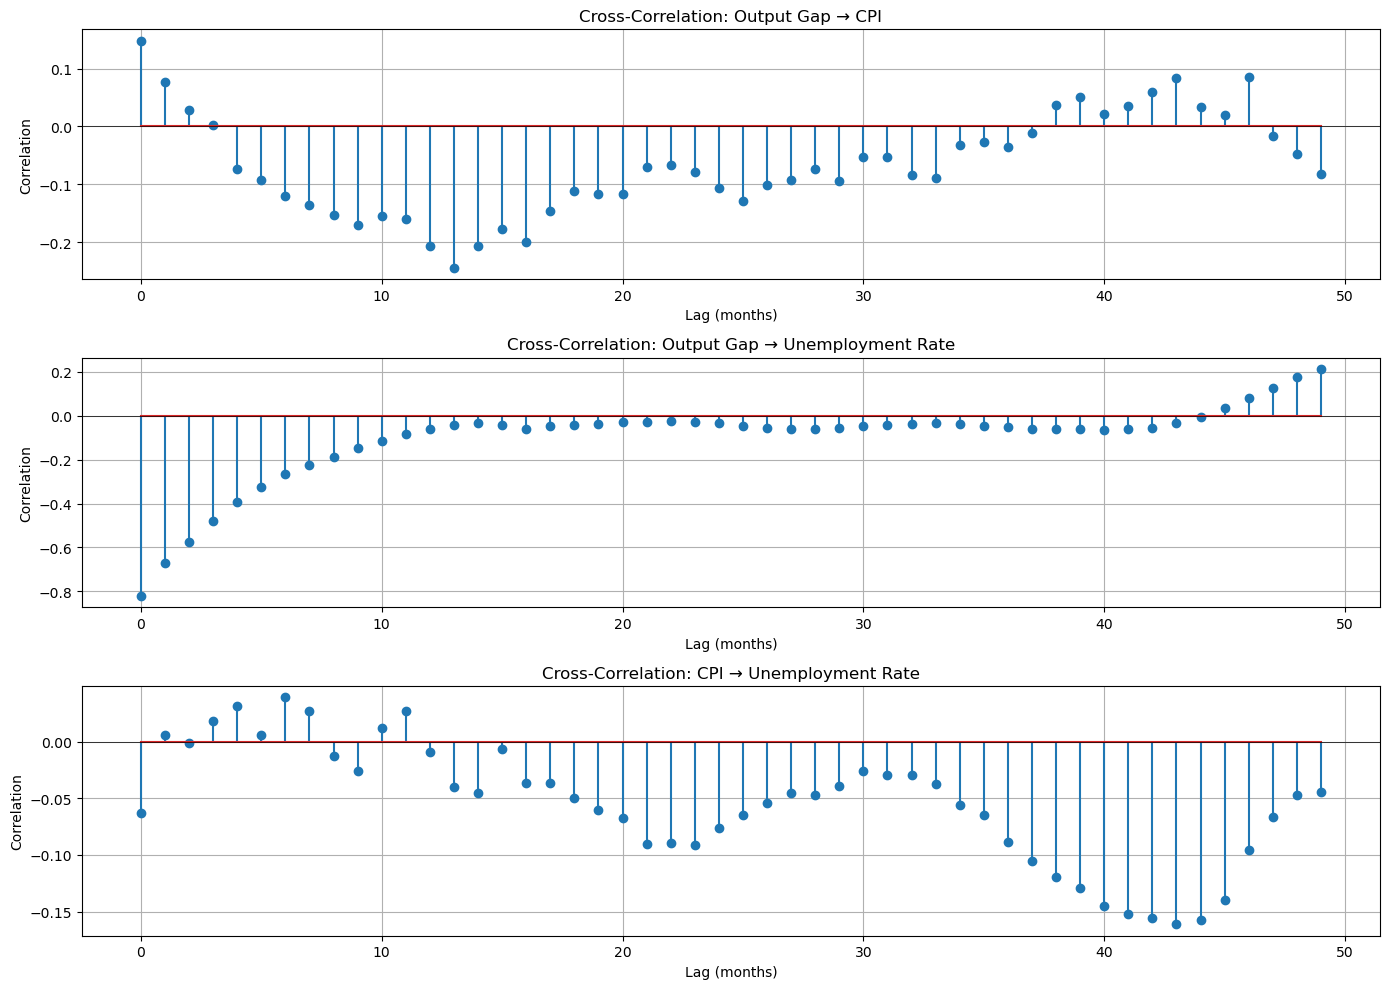

In [6]:
from statsmodels.tsa.stattools import ccf

# ÂáÜÂ§áÊï∞ÊçÆ
x1 = df_monthly['Output_Gap_z'] - df_monthly['Output_Gap_z'].mean()
y1 = df_monthly['CPI_z'] - df_monthly['CPI_z'].mean()
x2 = df_monthly['Output_Gap_z'] - df_monthly['Output_Gap_z'].mean()
y2 = df_monthly['Unemployment_Rate_z'] - df_monthly['Unemployment_Rate_z'].mean()
x3 = df_monthly['CPI_z'] - df_monthly['CPI_z'].mean()
y3 = df_monthly['Unemployment_Rate_z'] - df_monthly['Unemployment_Rate_z'].mean()

ccf1 = ccf(x1, y1)
ccf2 = ccf(x2, y2)
ccf3 = ccf(x3, y3)

# ÁªòÂõæ
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.stem(range(len(ccf1[:50])), ccf1[:50])
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Cross-Correlation: Output Gap ‚Üí CPI')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(range(len(ccf2[:50])), ccf2[:50])
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Cross-Correlation: Output Gap ‚Üí Unemployment Rate')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(range(len(ccf3[:50])), ccf3[:50])
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Cross-Correlation: CPI ‚Üí Unemployment Rate')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

üîç Top 2 Peak Frequencies and Corresponding Periods:
Peak 1: Frequency = 0.0254, Amplitude = 78.7225, Period = 39.43 time units
Peak 2: Frequency = 0.0072, Amplitude = 77.3389, Period = 138.00 time units


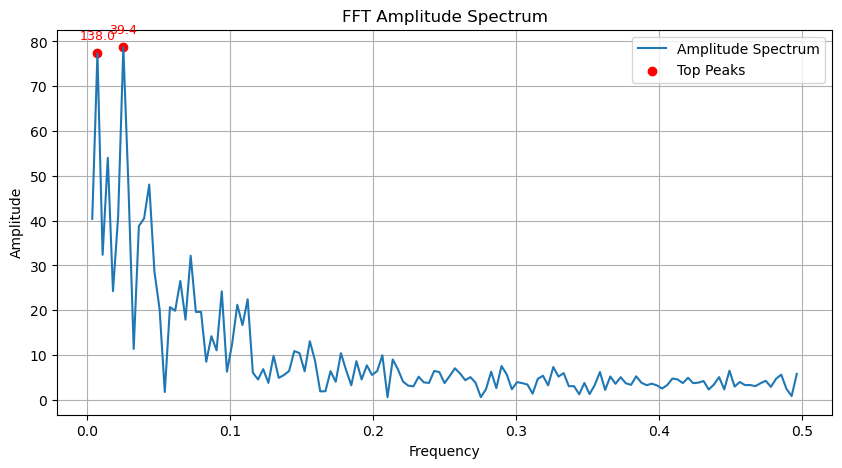

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform
x = df_monthly['Output_Gap_z'].dropna().values
n = len(x)
fft_result = np.fft.fft(x)
freqs = np.fft.fftfreq(n)

# Âè™ÂèñÂâç‰∏ÄÂçäÊ≠£È¢ëÁéáÈÉ®ÂàÜÔºàË∑≥ËøáÈ¢ëÁéá=0È°πÔºâ
positive_freqs = freqs[1:n//2]
amplitudes = np.abs(fft_result[1:n//2])  # Ë∑≥Ëøá DC ÊàêÂàÜÔºàÈ¢ëÁéá=0Ôºâ

# ÊâæÂá∫Ââç‰∏§‰∏™ÊúÄÂ§ßÁöÑÂ≥∞ÂÄºÁöÑÁ¥¢Âºï
top_two_idx = np.argpartition(amplitudes, -2)[-2:]
top_two_idx = top_two_idx[np.argsort(amplitudes[top_two_idx])[::-1]]  # ÈôçÂ∫èÊéíÂ∫è

# ËæìÂá∫‰∏§‰∏™Â≥∞ÁöÑ‰ø°ÊÅØ
print("üîç Top 2 Peak Frequencies and Corresponding Periods:")
for i, idx in enumerate(top_two_idx):
    freq = positive_freqs[idx]
    amp = amplitudes[idx]
    period = 1 / freq if freq != 0 else np.inf
    print(f"Peak {i+1}: Frequency = {freq:.4f}, Amplitude = {amp:.4f}, Period = {period:.2f} time units")

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, amplitudes, label='Amplitude Spectrum')
plt.scatter(positive_freqs[top_two_idx], amplitudes[top_two_idx], color='red', label='Top Peaks')

for idx in top_two_idx:
    plt.annotate(f"{1/positive_freqs[idx]:.1f}", 
                 (positive_freqs[idx], amplitudes[idx]), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

plt.title("FFT Amplitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC A

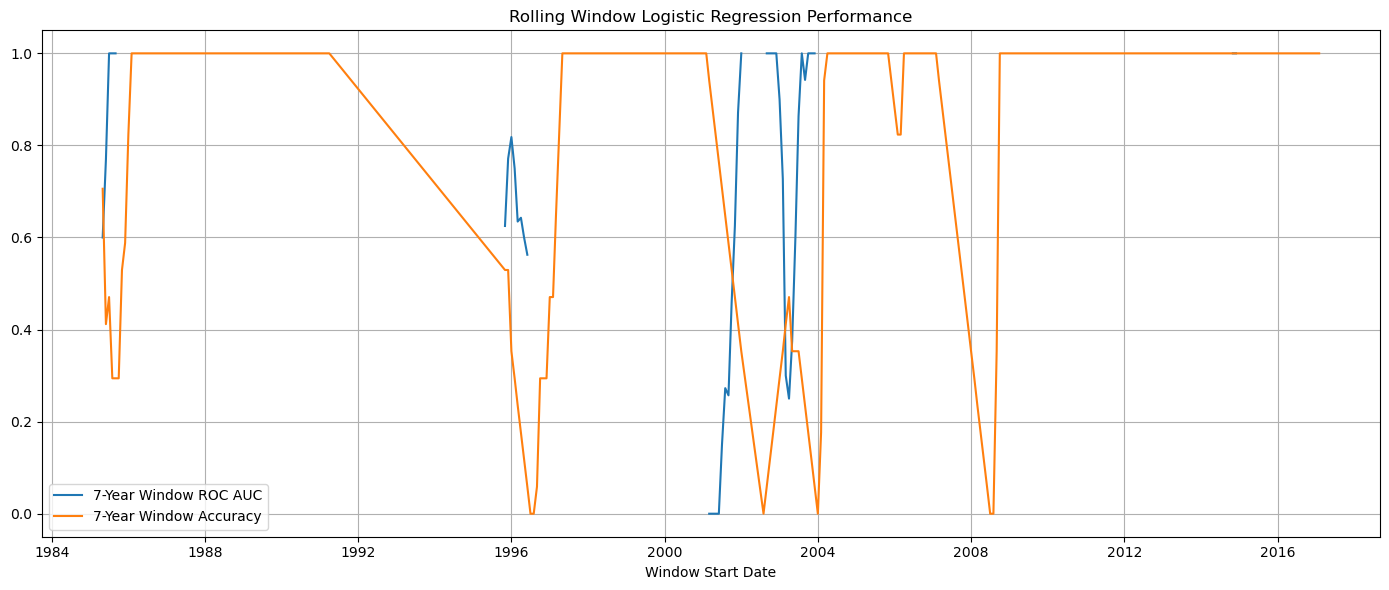

In [8]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. ‰∏ãËΩΩÊï∞ÊçÆ
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

actual_gdp = pdr.DataReader('GDPC1', 'fred', start_date, end_date)
potential_gdp = pdr.DataReader('GDPPOT', 'fred', start_date, end_date)
unrate = pdr.DataReader('UNRATE', 'fred', start_date, end_date)
cpi = pdr.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)
nber_recession = pdr.DataReader('USREC', 'fred', start_date, end_date)

# 2. ÂêàÂπ∂Êï∞ÊçÆ
df = pd.concat([actual_gdp, potential_gdp, unrate, cpi, nber_recession], axis=1)
df.columns = ['Actual_GDP', 'Potential_GDP', 'Unemployment_Rate', 'CPI', 'Recession']
df['Output_Gap'] = 100 * (df['Actual_GDP'] - df['Potential_GDP']) / df['Potential_GDP']
df = df.dropna()

# 3. ËΩ¨‰∏∫ÊúàÂ∫¶Êï∞ÊçÆÔºåÁº∫Â§±ÂÄºÂâçÂêëÂ°´ÂÖÖ
df_monthly = df.resample('M').ffill()

# 4. ÊªöÂä®Á™óÂè£ËØÑ‰º∞ÂáΩÊï∞
def rolling_window_evaluation(df, window_months=84):
    results = []
    for start in range(len(df) - window_months):
        window_data = df.iloc[start:start+window_months]
        X = window_data[['Output_Gap', 'Unemployment_Rate', 'CPI']]
        y = window_data['Recession']
        
        split_idx = int(len(window_data) * 0.8)
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        # Ë∑≥ËøáËÆ≠ÁªÉÈõÜ‰∏≠Âè™Êúâ‰∏Ä‰∏™Á±ªÂà´ÁöÑÁ™óÂè£
        if y_train.nunique() < 2:
            continue
        
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        auc = roc_auc_score(y_test, y_prob)
        accuracy = (y_pred == y_test).mean()
        
        results.append({
            'start_date': window_data.index[0],
            'end_date': window_data.index[-1],
            'roc_auc': auc,
            'accuracy': accuracy
        })
    return pd.DataFrame(results)

# 5. ÊâßË°åÊªöÂä®Á™óÂè£ËØÑ‰º∞Ôºà7Âπ¥Á™óÂè£Ôºâ
results_7y = rolling_window_evaluation(df_monthly, window_months=84)

# 6. ÁªìÊûúÂèØËßÜÂåñ
plt.figure(figsize=(14,6))
plt.plot(results_7y['start_date'], results_7y['roc_auc'], label='7-Year Window ROC AUC')
plt.plot(results_7y['start_date'], results_7y['accuracy'], label='7-Year Window Accuracy')
plt.xlabel('Window Start Date')
plt.title('Rolling Window Logistic Regression Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


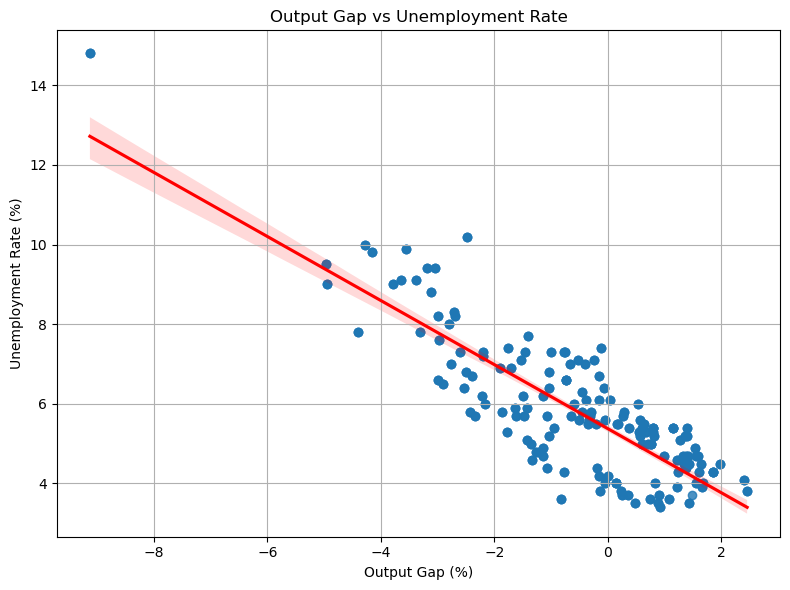

ÁöÆÂ∞îÊ£ÆÁõ∏ÂÖ≥Á≥ªÊï∞: -0.833, PÂÄº: 3.9e-122
Á∫øÊÄßÂõûÂΩíÔºöÂ§±‰∏öÁéá = 5.375 + -0.805 * Output Gap
R¬≤ = 0.694


In [9]:
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# ÂéªÊéâ NaNÔºà‰øùÈô©ÂÅöÊ≥ïÔºâ
analysis_df = df_monthly[['Output_Gap', 'Unemployment_Rate']].dropna()

# 1. Êï£ÁÇπÂõæ
plt.figure(figsize=(8, 6))
sns.regplot(data=analysis_df, x='Output_Gap', y='Unemployment_Rate', line_kws={"color": "red"})
plt.title('Output Gap vs Unemployment Rate')
plt.xlabel('Output Gap (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Áõ∏ÂÖ≥Á≥ªÊï∞
corr_value, p_value = pearsonr(analysis_df['Output_Gap'], analysis_df['Unemployment_Rate'])
print(f"ÁöÆÂ∞îÊ£ÆÁõ∏ÂÖ≥Á≥ªÊï∞: {corr_value:.3f}, PÂÄº: {p_value:.3g}")

# 3. ÁÆÄÂçïÁ∫øÊÄßÂõûÂΩí
X = analysis_df['Output_Gap'].values.reshape(-1, 1)
y = analysis_df['Unemployment_Rate'].values
model = LinearRegression().fit(X, y)
print(f"Á∫øÊÄßÂõûÂΩíÔºöÂ§±‰∏öÁéá = {model.intercept_:.3f} + {model.coef_[0]:.3f} * Output Gap")
print(f"R¬≤ = {model.score(X, y):.3f}")


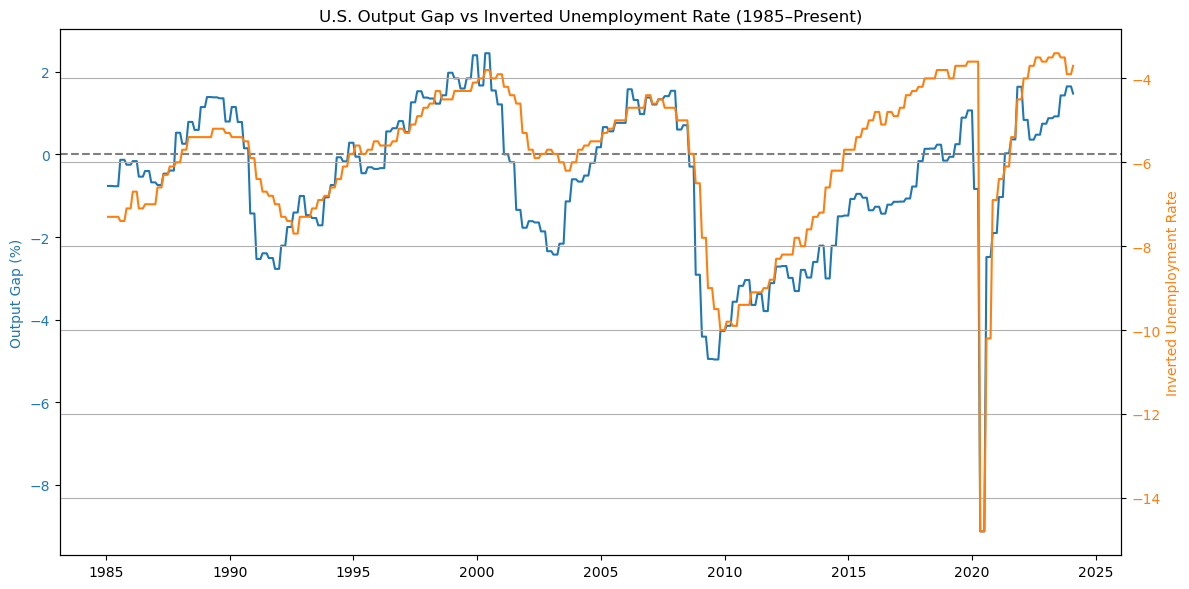

In [10]:
# ÁøªËΩ¨Â§±‰∏öÁéáÔºöÊñπÊ≥ï1ÔºöÂèñÂèç
df_monthly['Inverted_Unrate'] = -df_monthly['Unemployment_Rate']

# ÊñπÊ≥ï2ÔºàÊõ¥Áõ¥ËßÇÔºâÔºöÊúÄÂ§ßÂÄºÂáèÂéªÂΩìÂâçÂÄº
# max_unrate = df_monthly['Unemployment_Rate'].max()
# df_monthly['Inverted_Unrate'] = max_unrate - df_monthly['Unemployment_Rate']

# ÂèØËßÜÂåñÔºöÂèåËΩ¥ÂõæÔºàÂê´ÁøªËΩ¨Â§±‰∏öÁéáÔºâ
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Output Gap Êõ≤Á∫øÔºàÂ∑¶ËΩ¥Ôºâ
ax1.plot(df_monthly.index, df_monthly['Output_Gap'], label='Output Gap (%)', color='tab:blue')
ax1.set_ylabel('Output Gap (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.axhline(0, color='gray', linestyle='--')

# Â§±‰∏öÁéáÁøªËΩ¨ÂêéÊõ≤Á∫øÔºàÂè≥ËΩ¥Ôºâ
ax2.plot(df_monthly.index, df_monthly['Inverted_Unrate'], label='Inverted Unemployment Rate', color='tab:orange')
ax2.set_ylabel('Inverted Unemployment Rate', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('U.S. Output Gap vs Inverted Unemployment Rate (1985‚ÄìPresent)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


Êà™Ë∑ùÔºàŒ≤0ÔºâÔºö5.3747
ÂõûÂΩíÁ≥ªÊï∞ÔºàŒ≤1ÔºâÔºö-0.8045
Ê®°ÂûãR¬≤Ôºö0.6939


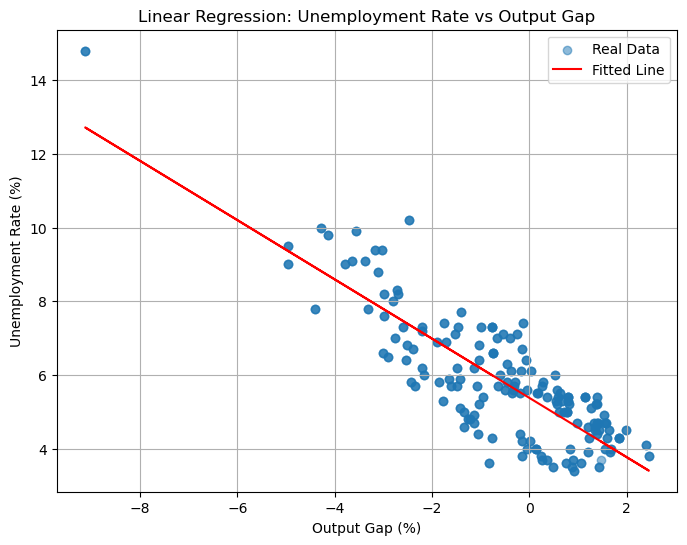

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ÂÅáËÆædf_monthlyÂ∑≤ÂåÖÂê´Output_GapÂíåUnemployment_RateÔºå‰∏îÊó†Áº∫Â§±ÂÄº
df_reg = df_monthly[['Output_Gap', 'Unemployment_Rate']].dropna()

# ÂáÜÂ§áÁâπÂæÅXÂíåÁõÆÊ†áy
X = df_reg['Output_Gap'].values.reshape(-1, 1)  # sklearnÈúÄË¶Å‰∫åÁª¥Êï∞ÁªÑ
y = df_reg['Unemployment_Rate'].values

# Âª∫Á´ãÁ∫øÊÄßÂõûÂΩíÊ®°Âûã
model = LinearRegression()
model.fit(X, y)

# ËæìÂá∫ÂõûÂΩíÁªìÊûú
print(f"Êà™Ë∑ùÔºàŒ≤0ÔºâÔºö{model.intercept_:.4f}")
print(f"ÂõûÂΩíÁ≥ªÊï∞ÔºàŒ≤1ÔºâÔºö{model.coef_[0]:.4f}")
print(f"Ê®°ÂûãR¬≤Ôºö{model.score(X, y):.4f}")

# È¢ÑÊµãÂÄº
y_pred = model.predict(X)

# ÁªòÂà∂ÂõûÂΩíÊï£ÁÇπÂõæ‰∏éÊãüÂêàÁõ¥Á∫ø
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, label='Real Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Output Gap (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Linear Regression: Unemployment Rate vs Output Gap')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        36
         1.0       0.00      0.00      0.00         1

    accuracy                           0.95        37
   macro avg       0.49      0.49      0.49        37
weighted avg       0.95      0.95      0.95        37

Ê∑∑Ê∑ÜÁü©Èòµ:
 [[35  1]
 [ 1  0]]
ROC AUC: 0.08333333333333337


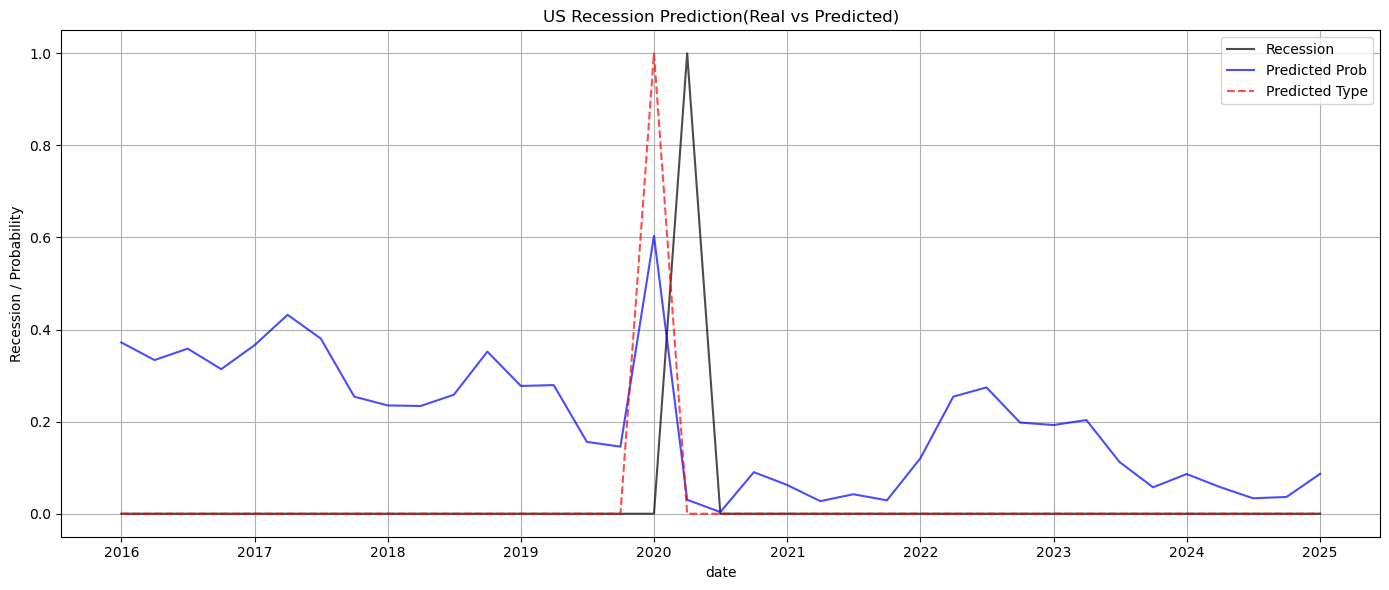

/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gdp_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


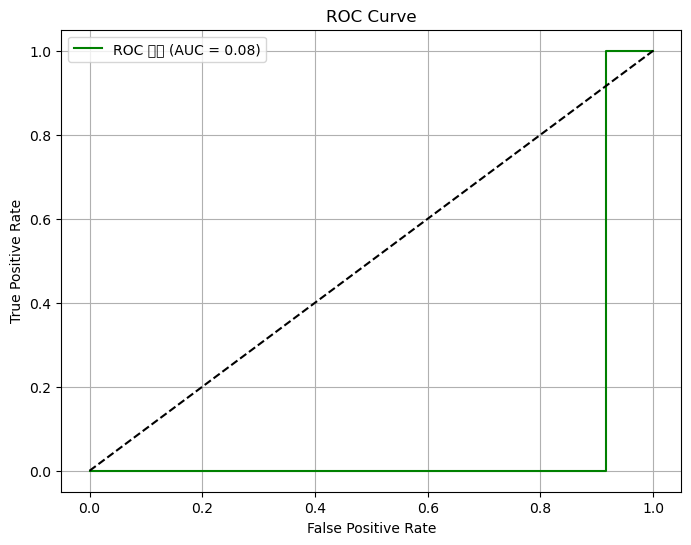

In [12]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Ëé∑ÂèñÊï∞ÊçÆ
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

actual_gdp = pdr.DataReader('GDPC1', 'fred', start_date, end_date)
potential_gdp = pdr.DataReader('GDPPOT', 'fred', start_date, end_date)
unrate = pdr.DataReader('UNRATE', 'fred', start_date, end_date)
nber_recession = pdr.DataReader('USREC', 'fred', start_date, end_date)

# 2. ÂêàÂπ∂Êï∞ÊçÆ
df = pd.concat([actual_gdp, potential_gdp, unrate, nber_recession], axis=1)
df.columns = ['Actual_GDP', 'Potential_GDP', 'Unemployment_Rate', 'Recession']
df['Output_Gap'] = 100 * (df['Actual_GDP'] - df['Potential_GDP']) / df['Potential_GDP']
df = df.dropna()

# 3. ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
train = df.loc[:'2015-12-31']
test = df.loc['2016-01-01':]

X_train = train[['Output_Gap', 'Unemployment_Rate']]
y_train = train['Recession']
X_test = test[['Output_Gap', 'Unemployment_Rate']]
y_test = test['Recession']

# 4. ËÆ≠ÁªÉÈÄªËæëÂõûÂΩí
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. È¢ÑÊµãÊ¶ÇÁéáÂíåÁ±ªÂà´
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# 6. ËØÑ‰º∞ÊâìÂç∞
print(classification_report(y_test, y_pred))
print('Ê∑∑Ê∑ÜÁü©Èòµ:\n', confusion_matrix(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_prob))

# 7. ÂèØËßÜÂåñÁúüÂÆû‰∏éÈ¢ÑÊµãË°∞ÈÄÄÂå∫Èó¥Ê¶ÇÁéáÂíåÈ¢ÑÊµãÁªìÊûú
plt.figure(figsize=(14,6))

plt.plot(test.index, y_test, label='Recession', color='black', linestyle='-', alpha=0.7)
plt.plot(test.index, y_prob, label='Predicted Prob', color='blue', alpha=0.7)
plt.plot(test.index, y_pred, label='Predicted Type', color='red', linestyle='--', alpha=0.7)

plt.title('US Recession Prediction(Real vs Predicted)')
plt.xlabel('date')
plt.ylabel('Recession / Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. ROCÊõ≤Á∫ø
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Êõ≤Á∫ø (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


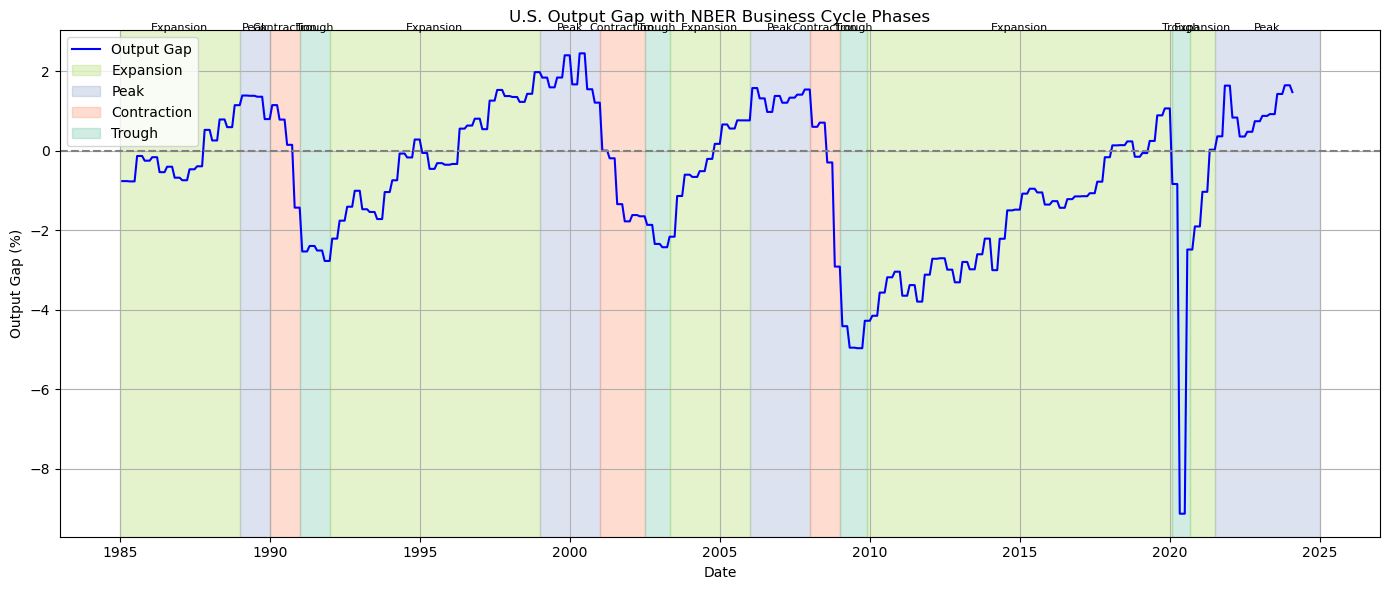

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(df_monthly.index, df_monthly["Output_Gap"], label="Output Gap", color="blue")
plt.axhline(0, color="gray", linestyle="--")
nber_cycles = [
    ("1985-01", "1989-01", "Expansion"),
    ("1989-01", "1990-01", "Peak"),
    ("1990-01", "1991-01", "Contraction"),
    ("1991-01", "1992-01", "Trough"),

    ("1992-01", "1999-01", "Expansion"),
    ("1999-01", "2001-01", "Peak"),
    ("2001-01", "2002-07", "Contraction"),
    ("2002-07", "2003-05", "Trough"),

    ("2003-05", "2006-01", "Expansion"),
    ("2006-01", "2008-01", "Peak"),
    ("2008-01", "2009-01", "Contraction"),
    ("2009-01", "2009-12", "Trough"),
    
    ("2009-12", "2020-02", "Expansion"),
    ("2020-02", "2020-09", "Trough"),
    ("2020-09", "2021-07", "Expansion"),
    ("2021-07", "2025-01", "Peak"),

]
cycle_colors = {
    "Expansion": "#a6d854",
    "Contraction": "#fc8d62",
    "Peak": "#8da0cb",
    "Trough": "#66c2a5" 
}

for start, end, label in nber_cycles:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    plt.axvspan(start_date, end_date, color=cycle_colors[label], alpha=0.3,
                label=label if plt.gca().get_legend_handles_labels()[1].count(label) == 0 else None)
    plt.text((start_date + (end_date - start_date) / 2), df_monthly["Output_Gap"].max() + 0.5,
             label, ha="center", va="bottom", fontsize=8)

plt.title("U.S. Output Gap with NBER Business Cycle Phases")
plt.xlabel("Date")
plt.ylabel("Output Gap (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from collections import defaultdict

# === Step 1: Load EPS data ===

df_eps = pd.read_excel("Top_20_US_Companies_EPS.xlsx")
df_eps['Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_eps['Dates'], unit='D')
df_eps = df_eps.drop(columns='Dates').set_index('Date')

# === Step 2: Load sector mapping ===
df_sector = pd.read_excel("Top_20_US_Companies_By_Sector_With_Bloomberg_Tickers.xlsx")
ticker_to_sector = dict(zip(df_sector['Bloomberg_Ticker'], df_sector['Sector']))

# === Step 3: Define business cycle phases ===
business_cycles = [
    ("1985-01", "1989-01", "Expansion"),
    ("1989-01", "1990-01", "Peak"),
    ("1990-01", "1991-01", "Contraction"),
    ("1991-01", "1992-01", "Trough"),
    ("1992-01", "1999-01", "Expansion"),
    ("1999-01", "2001-01", "Peak"),
    ("2001-01", "2002-07", "Contraction"),
    ("2002-07", "2003-03", "Trough"),
    ("2003-03", "2006-01", "Expansion"),
    ("2006-01", "2008-01", "Peak"),
    ("2008-01", "2009-01", "Contraction"),
    ("2009-01", "2009-12", "Trough"),
    ("2009-12", "2020-02", "Expansion"),
    ("2020-02", "2020-09", "Trough"),
    ("2020-09", "2021-07", "Expansion"),
    ("2021-07", "2025-01", "Peak"),
]

# === Step 4: Group periods by phase ===
phase_periods = defaultdict(list)
for start, end, phase in business_cycles:
    phase_periods[phase].append((pd.to_datetime(start), pd.to_datetime(end)))

# === Step 5: Compute average EPS for each sector and cycle phase ===
final_results = []

for phase, periods in phase_periods.items():
    # Merge time periods within the same phase
    df_phase = pd.DataFrame()
    for start_date, end_date in periods:
        df_slice = df_eps[(df_eps.index >= start_date) & (df_eps.index < end_date)]
        df_phase = pd.concat([df_phase, df_slice])

    # Calculate sector-level average EPS
    sector_eps = defaultdict(list)
    for ticker in df_phase.columns:
        sector = ticker_to_sector.get(ticker)
        if sector:
            sector_eps[sector].append(df_phase[ticker])

    for sector, eps_series in sector_eps.items():
        combined = pd.concat(eps_series, axis=1)
        avg_eps = combined.mean(axis=1, skipna=True).mean(skipna=True)
        if pd.notna(avg_eps):
            final_results.append({
                "Sector": sector,
                "Cycle_Phase": phase,
                "Average_EPS": avg_eps
            })

# === Step 6: Save or print results ===
df_result = pd.DataFrame(final_results)
print(df_result)
# df_result.to_excel("Sector_EPS_by_Cycle.xlsx", index=False)

                    Sector  Cycle_Phase  Average_EPS
0   Information Technology    Expansion     0.377949
1              Health Care    Expansion     0.725625
2               Financials    Expansion     1.337286
3   Communication Services    Expansion     0.146357
4   Consumer Discretionary    Expansion     1.063776
5         Consumer Staples    Expansion     0.543520
6                   Energy    Expansion     0.403222
7              Industrials    Expansion     0.907293
8                Materials    Expansion     0.621465
9              Real Estate    Expansion     0.417614
10               Utilities    Expansion     0.474361
11  Information Technology         Peak     0.722737
12             Health Care         Peak     1.364802
13              Financials         Peak     2.395394
14  Communication Services         Peak     0.222839
15  Consumer Discretionary         Peak     2.445370
16        Consumer Staples         Peak     0.711067
17                  Energy         Peak     1.

In [15]:
# Step 1: ËÅöÂêàÔºàÈò≤Ê≠¢ÈáçÂ§çÁªÑÂêàÔºâ
df_cleaned = df_result.groupby(["Sector", "Cycle_Phase"]).mean(numeric_only=True).reset_index()

# Step 2: Pivot ÊàêË°å‰∏ö √ó Âë®ÊúüÁöÑÁªìÊûÑ
df_pivot = df_cleaned.pivot(index="Sector", columns="Cycle_Phase", values="Average_EPS")

# Step 3: Êåâ‰Ω†Â∏åÊúõÁöÑÈ°∫Â∫èÊéíÂàóÂàó
df_pivot = df_pivot[["Expansion", "Peak", "Contraction", "Trough"]]

# Step 4: ËæìÂá∫ÁªìÊûúÔºàÂèØËßÜÂåñÊàñ‰øùÂ≠òÔºâ
print(df_pivot)

Cycle_Phase             Expansion      Peak  Contraction    Trough
Sector                                                            
Communication Services   0.146357  0.222839    -0.864942 -0.077588
Consumer Discretionary   1.063776  2.445370     0.170262  1.733276
Consumer Staples         0.543520  0.711067     0.335613  0.409108
Energy                   0.403222  1.501020     0.381152 -0.439363
Financials               1.337286  2.395394    -2.107126  0.747365
Health Care              0.725625  1.364802     0.253083  0.589745
Industrials              0.907293  1.483599     0.425254  0.461442
Information Technology   0.377949  0.722737     0.118438  0.187876
Materials                0.621465  0.913508     0.283431  0.372082
Real Estate              0.417614  0.649510     0.250533  0.401601
Utilities                0.474361  0.618444     0.399680  0.394564


In [16]:
# ËÆæÁΩÆÊó∂Èó¥Âå∫Èó¥
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# === 1. M2 YoY Â¢ûÈÄü ===
m2 = pdr.DataReader('M2SL', 'fred', start_date, end_date)
m2_yoy = m2.pct_change(periods=12) * 100
m2_yoy.rename(columns={'M2SL': 'M2_YoY'}, inplace=True)

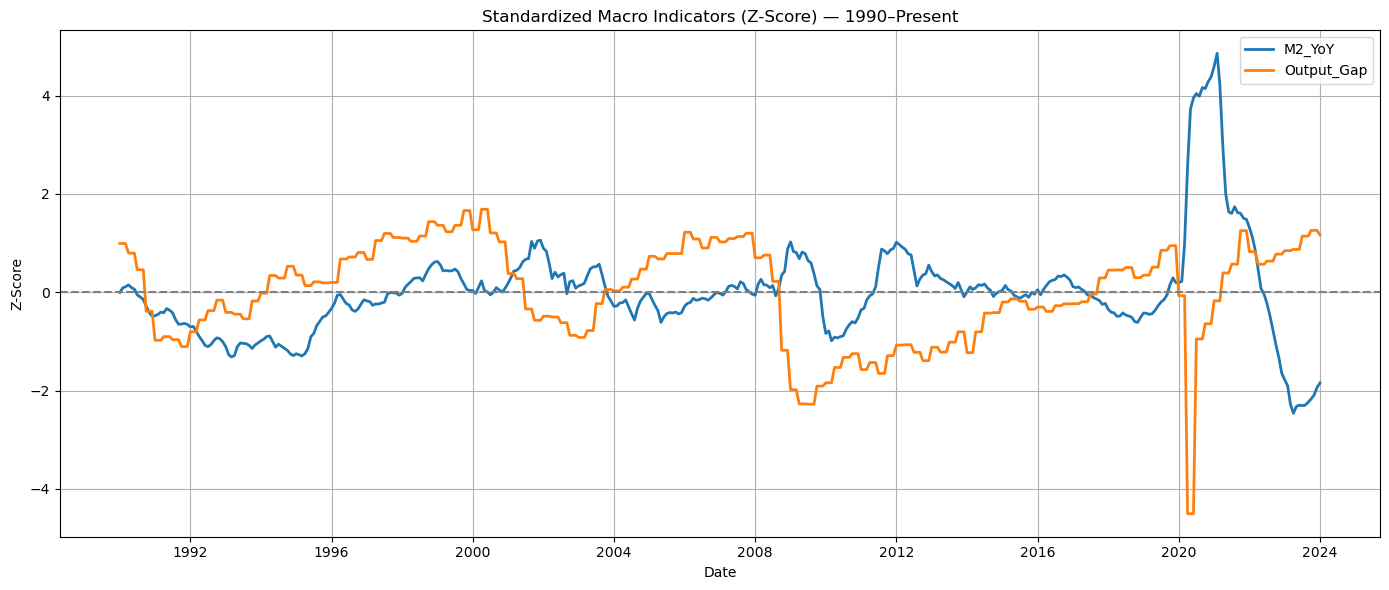

In [17]:
m2_yoy.index = m2_yoy.index.to_period('M').to_timestamp()
df_monthly.index = df_monthly.index.to_period('M').to_timestamp()  # ‰Ω†ÂéüÊù•ÁöÑ Output Gap

df_all = pd.concat([
    m2_yoy,
    df_monthly[['Output_Gap']]
], axis=1)

df_all = df_all.loc['1990-01-01':]

df_clean = df_all.dropna()
df_standardized = (df_clean - df_clean.mean()) / df_clean.std()

plt.figure(figsize=(14, 6))
for col in df_standardized.columns:
    plt.plot(df_standardized.index, df_standardized[col], label=col, linewidth=2)

plt.title("Standardized Macro Indicators (Z-Score) ‚Äî 1990‚ÄìPresent")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### S&P 500 Index

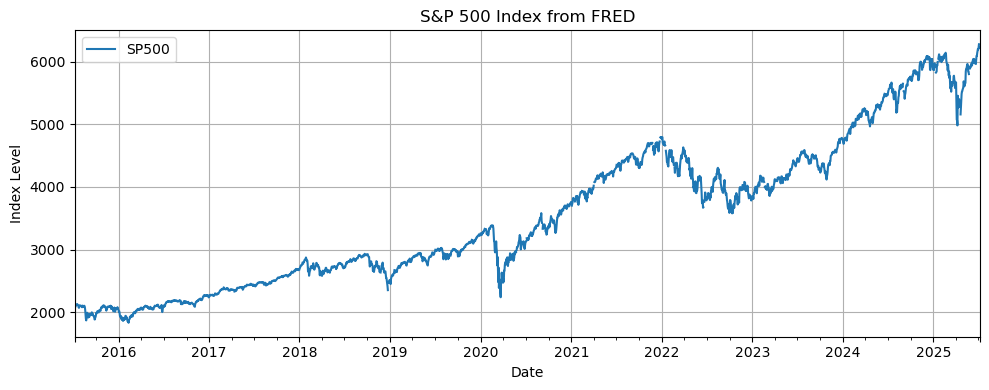

In [34]:
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

# ËÆæÁΩÆÊó∂Èó¥ËåÉÂõ¥
start = '1985-01-01'
end = datetime.today().strftime('%Y-%m-%d')

# ‰ªé FRED Ëé∑Âèñ S&P 500 ÊåáÊï∞ÔºàÊ≥®ÊÑèÔºöËøôÊòØÊúàÂ∫¶Êï∞ÊçÆÔºâ
sp500 = pdr.DataReader('SP500', 'fred', start, end)

# ÂèØËßÜÂåñ
sp500.plot(title='S&P 500 Index from FRED', figsize=(10, 4))
plt.grid(True)
plt.ylabel("Index Level")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


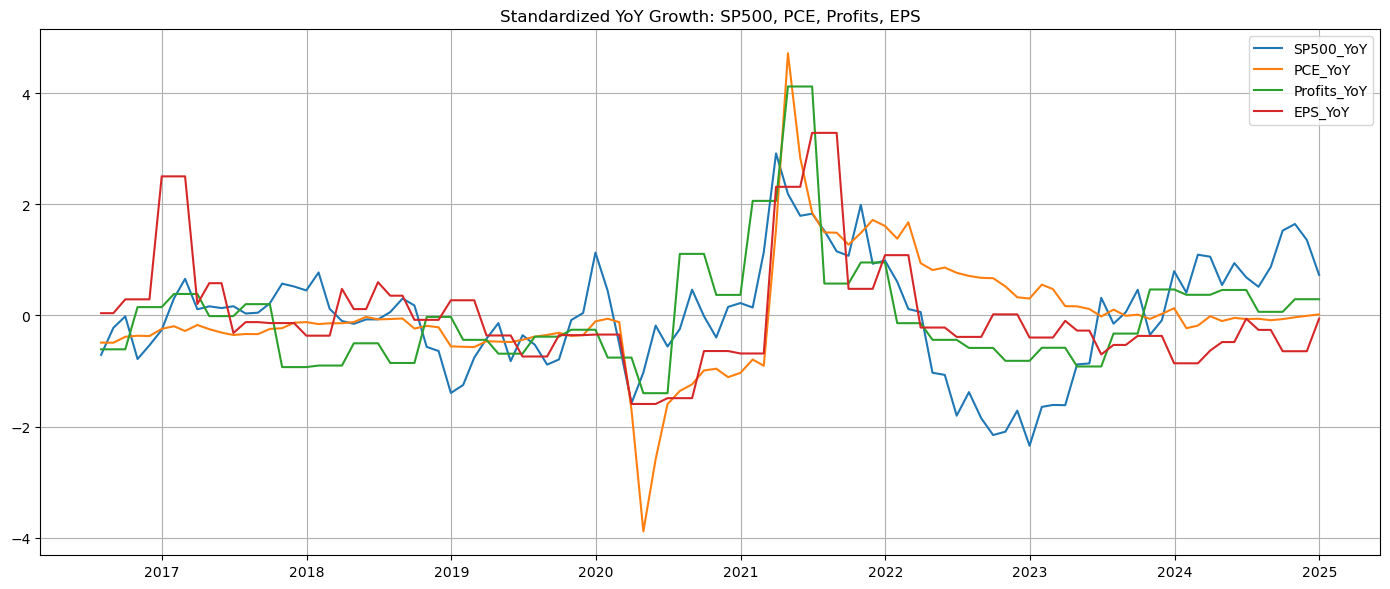

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Êó∂Èó¥ËÆæÁΩÆ ===
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# === 2. ‰ªé FRED Ëé∑ÂèñÊï∞ÊçÆ ===
sp500 = pdr.DataReader('SP500', 'fred', start_date, end_date)
pce = pdr.DataReader('PCE', 'fred', start_date, end_date)
profits = pdr.DataReader('CP', 'fred', start_date, end_date)

# === 3. ÈáçÈááÊ†∑‰∏∫ÊúàÂ∫¶ ===
sp500 = sp500.resample('M').last()
pce = pce.resample('M').last()
profits = profits.resample('M').last()

# === 4. ÊûÑÈÄ† EPS ÊúàÂ∫¶Êï∞ÊçÆ ===
# ÂÅáËÆæ df_eps Â∑≤ÁªèÂú®ÂÜÖÂ≠ò‰∏≠
df_eps_monthly = df_eps.resample('M').mean()  # ÊâÄÊúâÂÖ¨Âè∏ÁÆÄÂçïÂπ≥Âùá
df_eps_monthly['EPS'] = df_eps_monthly.mean(axis=1)

# === 5. ÊûÑÂª∫‰∏ªÂàÜÊûêË°® ===
df = pd.DataFrame(index=sp500.index)
df['SP500_YoY'] = sp500.pct_change(12) * 100
df['PCE_YoY'] = pce.pct_change(12) * 100
df['Profits_YoY'] = profits.pct_change(12) * 100
df['EPS_YoY'] = df_eps_monthly['EPS'].pct_change(12) * 100

# === 6. Ê∏ÖÊ¥ó + Ê†áÂáÜÂåñ ===
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 7. ÂèØËßÜÂåñÔºöÊ†áÂáÜÂåñË∂ãÂäø ===
plt.figure(figsize=(14, 6))
for col in df_std.columns:
    plt.plot(df_std.index, df_std[col], label=col)
plt.legend()
plt.title("Standardized YoY Growth: SP500, PCE, Profits, EPS")
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# === 8. ÂêåÊúüÁõ∏ÂÖ≥ÊÄß ===
corr_same = df_clean.corr()
print("„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë")
print(corr_same)

# === 9. ÊªûÂêéÁõ∏ÂÖ≥ÊÄßÔºöPCE„ÄÅProfits„ÄÅEPS ÊªûÂêé 12 ‰∏™Êúà vs SP500 ===
df_lagged = df_clean.copy()
df_lagged['PCE_YoY_lag12'] = df_lagged['PCE_YoY'].shift(12)
df_lagged['Profits_YoY_lag12'] = df_lagged['Profits_YoY'].shift(12)
df_lagged['EPS_YoY_lag12'] = df_lagged['EPS_YoY'].shift(12)

lag_corr = df_lagged[['SP500_YoY', 'PCE_YoY_lag12', 'Profits_YoY_lag12', 'EPS_YoY_lag12']].dropna().corr()
print("\n„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÊªûÂêé12‰∏™ÊúàÔºâ„Äë")
print(lag_corr)

„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë
             SP500_YoY   PCE_YoY  Profits_YoY   EPS_YoY
SP500_YoY     1.000000  0.340541     0.599959  0.381982
PCE_YoY       0.340541  1.000000     0.514355  0.642562
Profits_YoY   0.599959  0.514355     1.000000  0.479462
EPS_YoY       0.381982  0.642562     0.479462  1.000000

„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÊªûÂêé12‰∏™ÊúàÔºâ„Äë
                   SP500_YoY  PCE_YoY_lag12  Profits_YoY_lag12  EPS_YoY_lag12
SP500_YoY           1.000000      -0.639963          -0.217187      -0.519996
PCE_YoY_lag12      -0.639963       1.000000           0.521523       0.650402
Profits_YoY_lag12  -0.217187       0.521523           1.000000       0.513905
EPS_YoY_lag12      -0.519996       0.650402           0.513905       1.000000


The S&P 500 is an index, or a group of stocks that share one or more common traits. In this case, those shared characteristics include a high number of readily tradeable shares and size‚Äîthe index is made up of stocks from about 500 of the US‚Äôs largest companies. (As of January 2025, there are about 500 companies represented in the index, but this is subject to change.) Because these stocks come from sectors across the market, changes to the index‚Äôs value could tell you a lot about the performance of the stock market as a whole. The S&P 500‚Äôs value is determined by the combined average performance of the stocks within the index, with more weight given to larger companies. When the S&P 500‚Äôs value rises, that means enough stocks increased in value enough to bring up the total average value.

| Variable                  | Relationship to S\&P¬†500                     | Timing             |
| ------------------------- | -------------------------------------------- | ------------------ |
| **EPS YoY**               | Positive correlation; key driver             | Leading/Concurrent |
| **Corporate Profits YoY** | Positive correlation; supports EPS and price | Leading/Concurrent |
| **PCE YoY**               | Positive correlation; consumer-led earnings  | Leading/Concurrent |


### Consumer Expectation Index

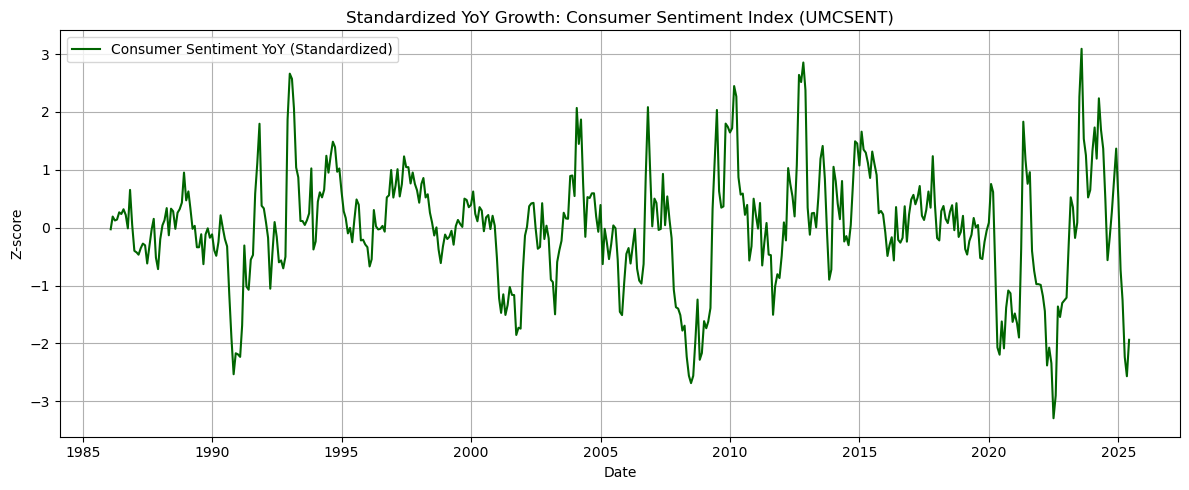

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Ëé∑Âèñ UMCSENT ===
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

umcsent = pdr.DataReader('UMCSENT', 'fred', start_date, end_date)
umcsent = umcsent.resample('M').last()

# === 2. ËÆ°ÁÆóÂêåÊØîÂ¢ûÈÄüÔºàYoYÔºâÂπ∂Ê†áÂáÜÂåñ ===
df = pd.DataFrame(index=umcsent.index)
df['UMCSENT_YoY'] = umcsent.pct_change(12) * 100
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 3. ÁªòÂõæ ===
plt.figure(figsize=(12, 5))
plt.plot(df_std.index, df_std['UMCSENT_YoY'], label='Consumer Sentiment YoY (Standardized)', color='darkgreen')
plt.title("Standardized YoY Growth: Consumer Sentiment Index (UMCSENT)")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

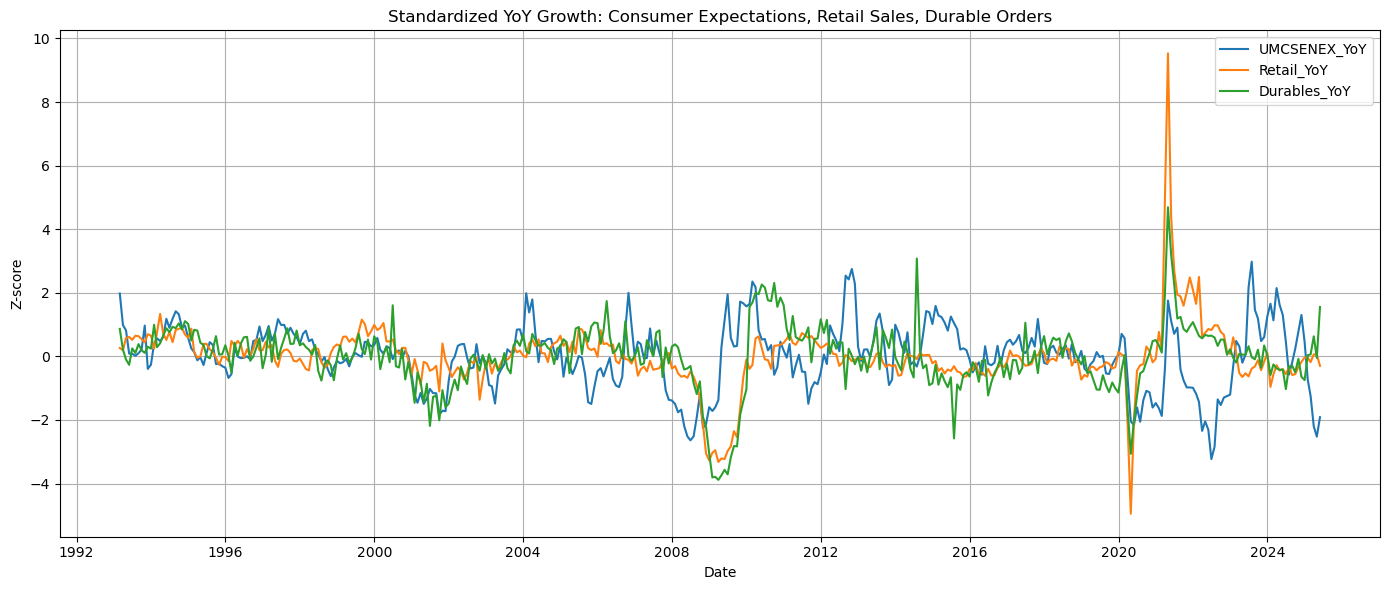

„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë
              UMCSENEX_YoY  Retail_YoY  Durables_YoY
UMCSENEX_YoY      1.000000    0.105143      0.140565
Retail_YoY        0.105143    1.000000      0.730711
Durables_YoY      0.140565    0.730711      1.000000

„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàRetail / Durables ÊªûÂêé12‰∏™Êúà vs UMCSENEX ÂΩìÂâçÔºâ„Äë
                    UMCSENEX_YoY  Retail_YoY_lag12  Durables_YoY_lag12
UMCSENEX_YoY            1.000000         -0.264620           -0.186409
Retail_YoY_lag12       -0.264620          1.000000            0.734797
Durables_YoY_lag12     -0.186409          0.734797            1.000000


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Êó∂Èó¥ËÆæÁΩÆ ===
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# === 2. ‰∏ãËΩΩÊï∞ÊçÆ ===
umcsenex = pdr.DataReader('UMCSENT', 'fred', start_date, end_date)  # Ê∂àË¥πËÄÖÈ¢ÑÊúü
retail = pdr.DataReader('RSAFS', 'fred', start_date, end_date)       # Èõ∂ÂîÆÈîÄÂîÆ
durables = pdr.DataReader('DGORDER', 'fred', start_date, end_date)   # ËÄêÁî®ÂìÅËÆ¢Âçï

# === 3. ÈáçÈááÊ†∑‰∏∫ÊúàÂ∫¶Ôºà‰øùÈô©Â§ÑÁêÜÔºâ===
umcsenex = umcsenex.resample('M').last()
retail = retail.resample('M').last()
durables = durables.resample('M').last()

# === 4. ÊûÑÂª∫‰∏ªË°® & ÂêåÊØîÂ¢ûÈÄüËÆ°ÁÆó ===
df = pd.DataFrame(index=umcsenex.index)
df['UMCSENEX_YoY'] = umcsenex.pct_change(12) * 100
df['Retail_YoY'] = retail.pct_change(12) * 100
df['Durables_YoY'] = durables.pct_change(12) * 100

# === 5. Ê∏ÖÊ¥óÁº∫Â§±ÂÄº ===
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 6. Ê†áÂáÜÂåñË∂ãÂäøÂèØËßÜÂåñ ===
plt.figure(figsize=(14, 6))
for col in df_std.columns:
    plt.plot(df_std.index, df_std[col], label=col)
plt.title("Standardized YoY Growth: Consumer Expectations, Retail Sales, Durable Orders")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. ÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ ===
print("„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë")
print(df_clean.corr())

# === 8. ÊªûÂêéÁõ∏ÂÖ≥ÊÄßÔºàÊªûÂêé12‰∏™Êúà vs UMCSENEXÔºâ===
df_lagged = df_clean.copy()
df_lagged['Retail_YoY_lag12'] = df_lagged['Retail_YoY'].shift(12)
df_lagged['Durables_YoY_lag12'] = df_lagged['Durables_YoY'].shift(12)

lag_corr = df_lagged[['UMCSENEX_YoY', 'Retail_YoY_lag12', 'Durables_YoY_lag12']].dropna().corr()
print("\n„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàRetail / Durables ÊªûÂêé12‰∏™Êúà vs UMCSENEX ÂΩìÂâçÔºâ„Äë")
print(lag_corr)


### Average Weekly Hours

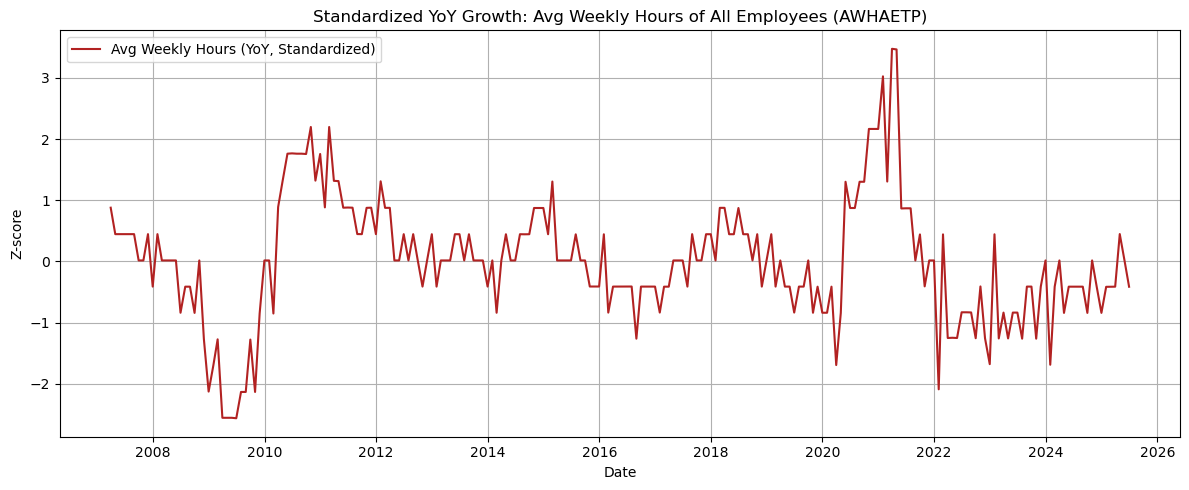

„ÄêAWHAETPÔºöÂΩìÂâç‰∏éÊªûÂêé12‰∏™ÊúàÁöÑËá™Áõ∏ÂÖ≥„Äë
                   AWHAETP_YoY  AWHAETP_YoY_lag12
AWHAETP_YoY           1.000000          -0.181755
AWHAETP_YoY_lag12    -0.181755           1.000000


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Ëé∑Âèñ AWHAETP Êï∞ÊçÆ ===
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

awh = pdr.DataReader('AWHAETP', 'fred', start_date, end_date)
awh = awh.resample('M').last()

# === 2. ËÆ°ÁÆóÂêåÊØîÂ¢ûÈÄüÔºàYoYÔºâÂπ∂Ê†áÂáÜÂåñ ===
df = pd.DataFrame(index=awh.index)
df['AWHAETP_YoY'] = awh.pct_change(12) * 100
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 3. ÁªòÂõæÔºöÊ†áÂáÜÂåñ YoY Êõ≤Á∫ø ===
plt.figure(figsize=(12, 5))
plt.plot(df_std.index, df_std['AWHAETP_YoY'], label='Avg Weekly Hours (YoY, Standardized)', color='firebrick')
plt.title("Standardized YoY Growth: Avg Weekly Hours of All Employees (AWHAETP)")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 4. ÊªûÂêéËá™Áõ∏ÂÖ≥Ôºàlag-12ÔºâÂàÜÊûê ===
df_lagged = df_clean.copy()
df_lagged['AWHAETP_YoY_lag12'] = df_lagged['AWHAETP_YoY'].shift(12)
corr_matrix = df_lagged[['AWHAETP_YoY', 'AWHAETP_YoY_lag12']].dropna().corr()

print("„ÄêAWHAETPÔºöÂΩìÂâç‰∏éÊªûÂêé12‰∏™ÊúàÁöÑËá™Áõ∏ÂÖ≥„Äë")
print(corr_matrix)


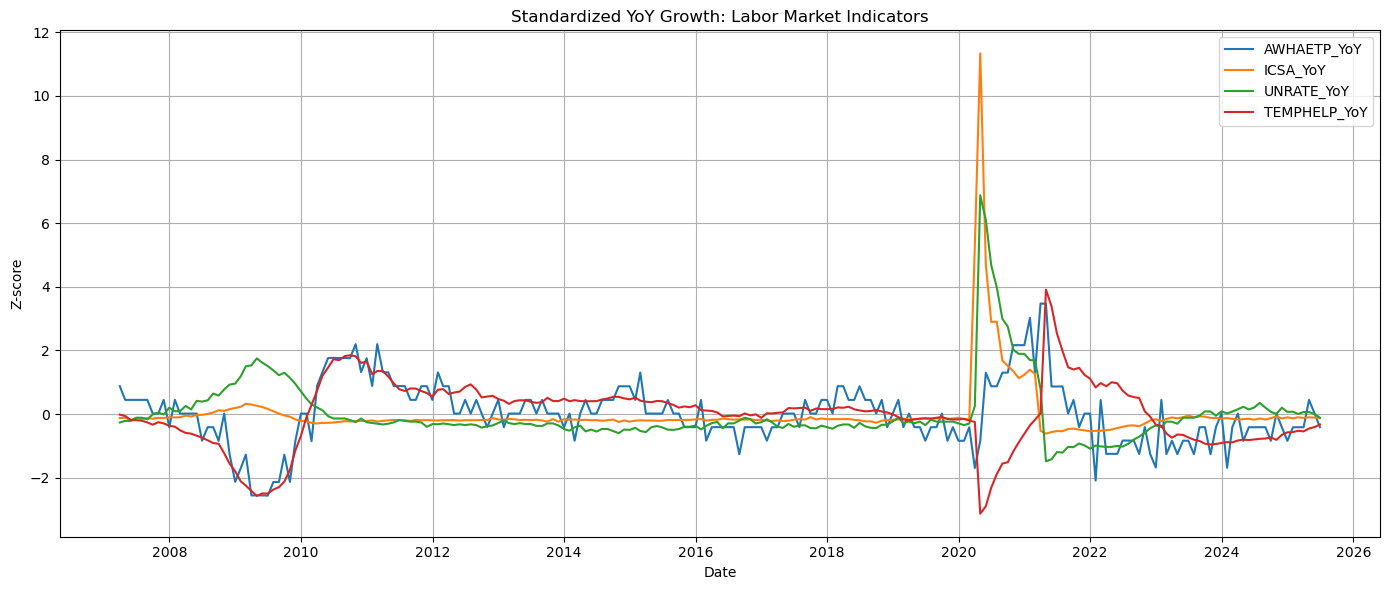

„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë
              AWHAETP_YoY  ICSA_YoY  UNRATE_YoY  TEMPHELP_YoY
AWHAETP_YoY      1.000000  0.003699   -0.013845      0.515930
ICSA_YoY         0.003699  1.000000    0.788258     -0.439709
UNRATE_YoY      -0.013845  0.788258    1.000000     -0.720781
TEMPHELP_YoY     0.515930 -0.439709   -0.720781      1.000000

„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÂÖ∂‰ªñÂèòÈáèÊªûÂêé12‰∏™Êúà vs AWHAETPÔºâ„Äë
                    AWHAETP_YoY  ICSA_YoY_lag12  UNRATE_YoY_lag12  \
AWHAETP_YoY            1.000000        0.324426          0.280819   
ICSA_YoY_lag12         0.324426        1.000000          0.789700   
UNRATE_YoY_lag12       0.280819        0.789700          1.000000   
TEMPHELP_YoY_lag12    -0.153317       -0.448980         -0.725633   

                    TEMPHELP_YoY_lag12  
AWHAETP_YoY                  -0.153317  
ICSA_YoY_lag12               -0.448980  
UNRATE_YoY_lag12             -0.725633  
TEMPHELP_YoY_lag12            1.000000  


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Ëé∑Âèñ FRED Êï∞ÊçÆ ===
start_date = '1985-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

awh = pdr.DataReader('AWHAETP', 'fred', start_date, end_date)
icsa = pdr.DataReader('ICSA', 'fred', start_date, end_date)
unrate = pdr.DataReader('UNRATE', 'fred', start_date, end_date)
temphelp = pdr.DataReader('TEMPHELPS', 'fred', start_date, end_date)

# === 2. ËΩ¨Êç¢‰∏∫ÊúàÂ∫¶Êï∞ÊçÆ ===
awh = awh.resample('M').last()
icsa = icsa.resample('M').mean()       # Â§±‰∏öÁî≥ËØ∑ÊòØÂë®È¢ë ‚Üí ÊúàÂπ≥Âùá
unrate = unrate.resample('M').last()
temphelp = temphelp.resample('M').last()

# === 3. ËÆ°ÁÆóÂêåÊØîÂ¢ûÈÄüÔºàYoYÔºâ===
df = pd.DataFrame(index=awh.index)
df['AWHAETP_YoY'] = awh.pct_change(12) * 100
df['ICSA_YoY'] = icsa.pct_change(12) * 100
df['UNRATE_YoY'] = unrate.pct_change(12) * 100
df['TEMPHELP_YoY'] = temphelp.pct_change(12) * 100

# === 4. Ê∏ÖÊ¥ó + Ê†áÂáÜÂåñ ===
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 5. ÂèØËßÜÂåñÔºöZ-score Âπ∂ÂàóÊõ≤Á∫øÂõæ ===
plt.figure(figsize=(14, 6))
for col in df_std.columns:
    plt.plot(df_std.index, df_std[col], label=col)
plt.title("Standardized YoY Growth: Labor Market Indicators")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. ÂêåÊúüÁõ∏ÂÖ≥ÊÄß ===
print("„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë")
print(df_clean.corr())

# === 7. ÊªûÂêéÁõ∏ÂÖ≥ÊÄßÔºà‰∏é AWHAETP ÊªûÂêé12ÊúàÊØîËæÉÔºâ===
df_lag = df_clean.copy()
for var in ['ICSA_YoY', 'UNRATE_YoY', 'TEMPHELP_YoY']:
    df_lag[var + '_lag12'] = df_lag[var].shift(12)

lag_corr = df_lag[['AWHAETP_YoY', 'ICSA_YoY_lag12', 'UNRATE_YoY_lag12', 'TEMPHELP_YoY_lag12']].dropna().corr()

print("\n„ÄêÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÂÖ∂‰ªñÂèòÈáèÊªûÂêé12‰∏™Êúà vs AWHAETPÔºâ„Äë")
print(lag_corr)


### Vendor Performance

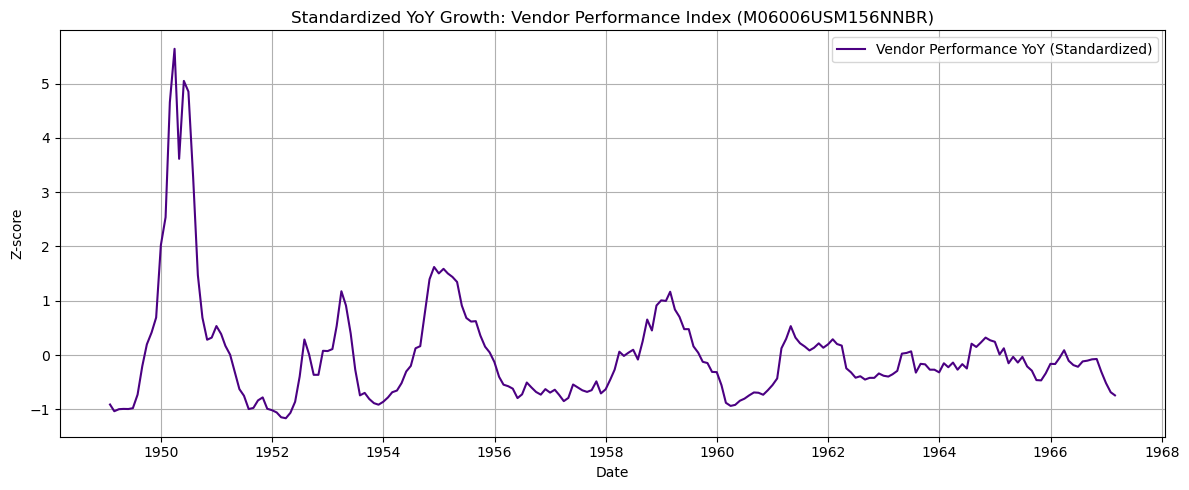

„ÄêVendor PerformanceÔºöÂΩìÂâç‰∏éÊªûÂêé12‰∏™ÊúàÁöÑËá™Áõ∏ÂÖ≥„Äë
                  Vendor_YoY  Vendor_YoY_lag12
Vendor_YoY          1.000000         -0.292855
Vendor_YoY_lag12   -0.292855          1.000000


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr

# === 1. Ëé∑Âèñ Vendor Performance Êï∞ÊçÆÔºàÂçï‰Ωç‰∏∫%Ôºâ===
start_date = '1948-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

vendor = pdr.DataReader('M06006USM156NNBR', 'fred', start_date, end_date)
vendor = vendor.resample('M').last()  # Êúâ‰∫õÊúà‰ªΩÁº∫Â§±ÔºåÈúÄË¶ÅË°•ÊàêÊúàÈ¢ë

# === 2. ËÆ°ÁÆóÂêåÊØîÂ¢ûÈÄüÔºàÂçï‰ΩçÂ∑≤ÊòØÁôæÂàÜÊØîÔºå‰∏ç‰πò100Ôºâ===
df = pd.DataFrame(index=vendor.index)
df['Vendor_YoY'] = vendor.pct_change(12)

# === 3. Ê∏ÖÊ¥ó + Ê†áÂáÜÂåñ ===
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# === 4. ÁªòÂõæÔºöÊ†áÂáÜÂåñË∂ãÂäø ===
plt.figure(figsize=(12, 5))
plt.plot(df_std.index, df_std['Vendor_YoY'], label='Vendor Performance YoY (Standardized)', color='indigo')
plt.title("Standardized YoY Growth: Vendor Performance Index (M06006USM156NNBR)")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 5. ÊªûÂêé 12 ‰∏™ÊúàËá™Áõ∏ÂÖ≥ ===
df_lagged = df_clean.copy()
df_lagged['Vendor_YoY_lag12'] = df_lagged['Vendor_YoY'].shift(12)

print("„ÄêVendor PerformanceÔºöÂΩìÂâç‰∏éÊªûÂêé12‰∏™ÊúàÁöÑËá™Áõ∏ÂÖ≥„Äë")
print(df_lagged[['Vendor_YoY', 'Vendor_YoY_lag12']].dropna().corr())


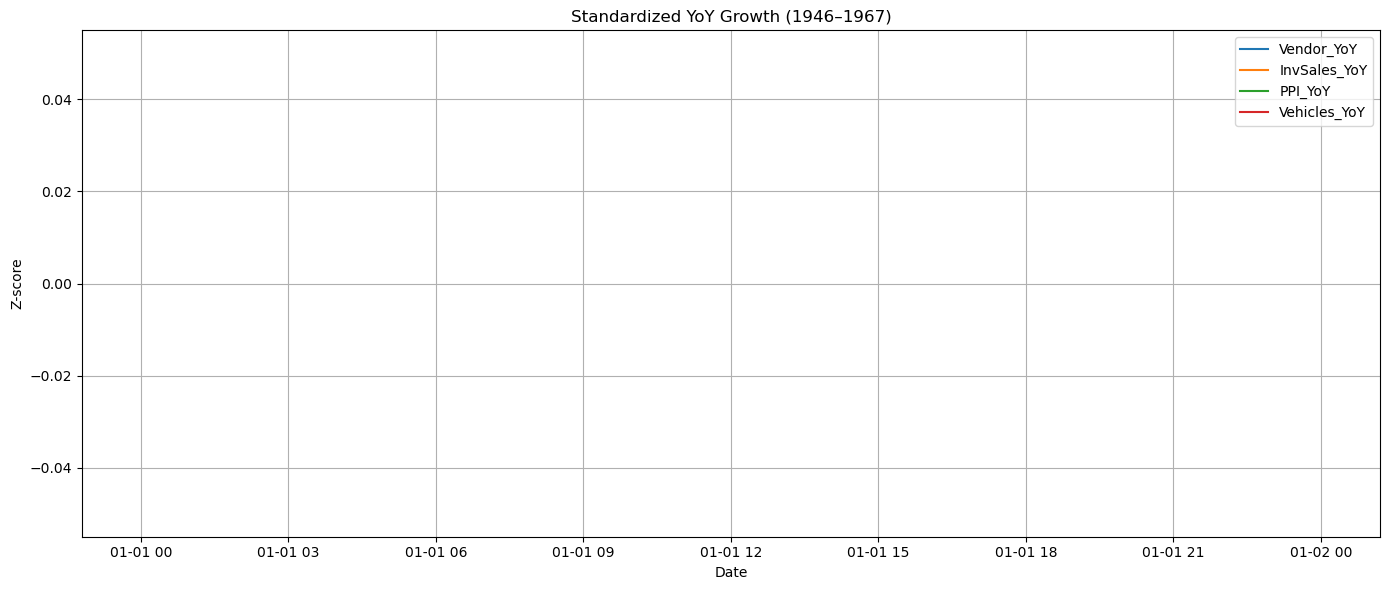

„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë
              Vendor_YoY  InvSales_YoY  PPI_YoY  Vehicles_YoY
Vendor_YoY           NaN           NaN      NaN           NaN
InvSales_YoY         NaN           NaN      NaN           NaN
PPI_YoY              NaN           NaN      NaN           NaN
Vehicles_YoY         NaN           NaN      NaN           NaN

„ÄêÊªûÂêé12‰∏™ÊúàÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë
                    Vendor_YoY  InvSales_YoY_lag12  PPI_YoY_lag12  \
Vendor_YoY                 NaN                 NaN            NaN   
InvSales_YoY_lag12         NaN                 NaN            NaN   
PPI_YoY_lag12              NaN                 NaN            NaN   
Vehicles_YoY_lag12         NaN                 NaN            NaN   

                    Vehicles_YoY_lag12  
Vendor_YoY                         NaN  
InvSales_YoY_lag12                 NaN  
PPI_YoY_lag12                      NaN  
Vehicles_YoY_lag12                 NaN  


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# 1. ËÆæÁΩÆÊó∂Èó¥ËåÉÂõ¥
start_date = '1946-01-01'
end_date = '1967-12-31'

# 2. Ëé∑ÂèñÊï∞ÊçÆÔºàVendor, Inventory/Sales, PPI, Durable Vehicle OutputÔºâ
vendor = pdr.DataReader('M06006USM156NNBR', 'fred', start_date, end_date)       # Vendor Performance
inv_sales = pdr.DataReader('MNFCTRIRSA', 'fred', start_date, end_date)    # Inventory/Sales Ratio
ppi = pdr.DataReader('PCUAWHLTRAWHLTR', 'fred', start_date, end_date)          # Wholesale Price Index
vehicles = pdr.DataReader('IPG3366S', 'fred', start_date, end_date)             # Durable Goods: Motor Vehicles

# 3. ÈáçÈááÊ†∑‰∏∫ÊúàÂ∫¶
vendor = vendor.resample('M').last()
inv_sales = inv_sales.resample('M').last()
ppi = ppi.resample('M').last()
vehicles = vehicles.resample('M').last()

# 4. ËÆ°ÁÆóÂêåÊØîÂ¢ûÈÄüÔºàYoYÔºâ
df = pd.DataFrame(index=vendor.index)
df['Vendor_YoY'] = vendor.pct_change(12)
df['InvSales_YoY'] = inv_sales.pct_change(12)
df['PPI_YoY'] = ppi.pct_change(12)
df['Vehicles_YoY'] = vehicles.pct_change(12)

# 5. Ê∏ÖÊ¥óÁº∫Â§±ÂÄº + Ê†áÂáÜÂåñ
df_clean = df.dropna()
df_std = (df_clean - df_clean.mean()) / df_clean.std()

# 6. ÁªòÂà∂Ê†áÂáÜÂåñË∂ãÂäøÂõæ
plt.figure(figsize=(14, 6))
for col in df_std.columns:
    plt.plot(df_std.index, df_std[col], label=col)
plt.title("Standardized YoY Growth (1946‚Äì1967)")
plt.xlabel("Date")
plt.ylabel("Z‚Äëscore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. ÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
print("„ÄêÂêåÊúüÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë")
print(df_clean.corr())

# 8. ÊªûÂêéÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºàÂÖ∂‰ªñÂèòÈáèÊªûÂêé12‰∏™Êúà vs Vendor ÂΩìÂâçÔºâ
df_lag = df_clean.copy()
for var in ['InvSales_YoY', 'PPI_YoY', 'Vehicles_YoY']:
    df_lag[f'{var}_lag12'] = df_lag[var].shift(12)

lag_corr = df_lag[['Vendor_YoY',
                   'InvSales_YoY_lag12',
                   'PPI_YoY_lag12',
                   'Vehicles_YoY_lag12']].dropna().corr()

print("\n„ÄêÊªûÂêé12‰∏™ÊúàÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„Äë")
print(lag_corr)


In [72]:
print(df.isna().mean())


Vendor_YoY       1.0000
Inventory_YoY    0.0300
Import_YoY       0.0075
dtype: float64


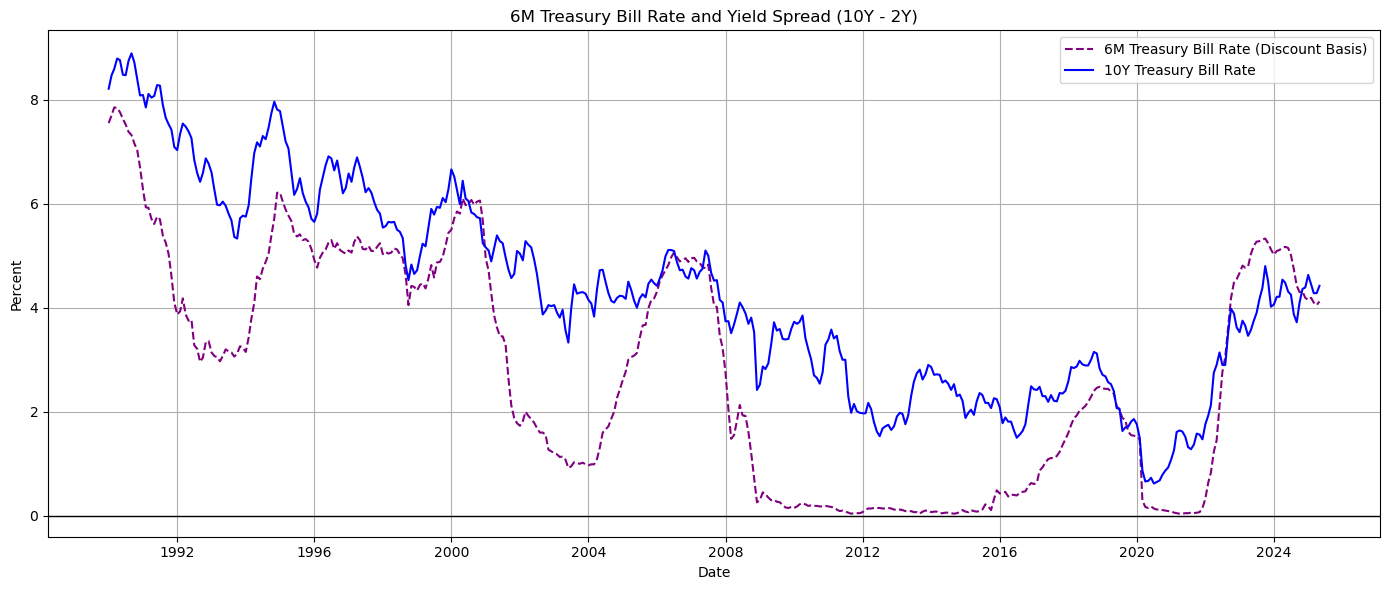

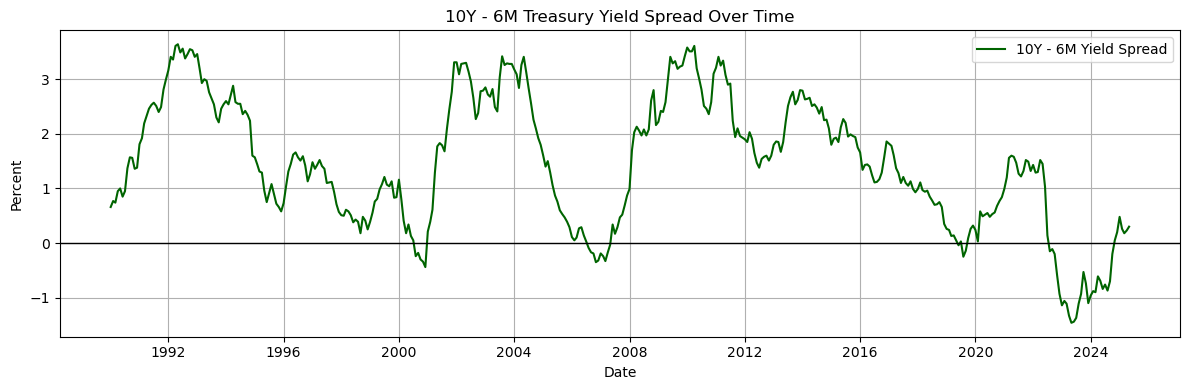

In [18]:
df_tb = pd.read_csv("fredgraph.csv")

df_tb.columns = df_tb.columns.str.strip()
df_tb = df_tb.rename(columns={
    'observation_date': 'Date',
    'DGS10': 'TBill_10Y',
    'DTB6': 'TBill_6M'
})


df_tb['Date'] = pd.to_datetime(df_tb['Date'])

df_tb['10Y_minus_6M'] = df_tb['TBill_10Y'] - df_tb['TBill_6M']

df_tb['Date'] = pd.to_datetime(df_tb['Date'])
#figure 1
plt.figure(figsize=(14, 6))
plt.plot(df_tb['Date'], df_tb['TBill_6M'], label='6M Treasury Bill Rate (Discount Basis)', linestyle='--', color='purple')
plt.plot(df_tb['Date'], df_tb['TBill_10Y'], label='10Y Treasury Bill Rate', color='blue')
plt.axhline(0, color='black', linewidth=1)
plt.title("6M Treasury Bill Rate and Yield Spread (10Y - 2Y)")
plt.ylabel("Percent")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
#figure2
plt.show()
plt.figure(figsize=(12, 4))
plt.plot(df_tb['Date'], df_tb['10Y_minus_6M'], label='10Y - 6M Yield Spread', color='darkgreen')
plt.axhline(0, color='black', linewidth=1)
plt.title("10Y - 6M Treasury Yield Spread Over Time")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

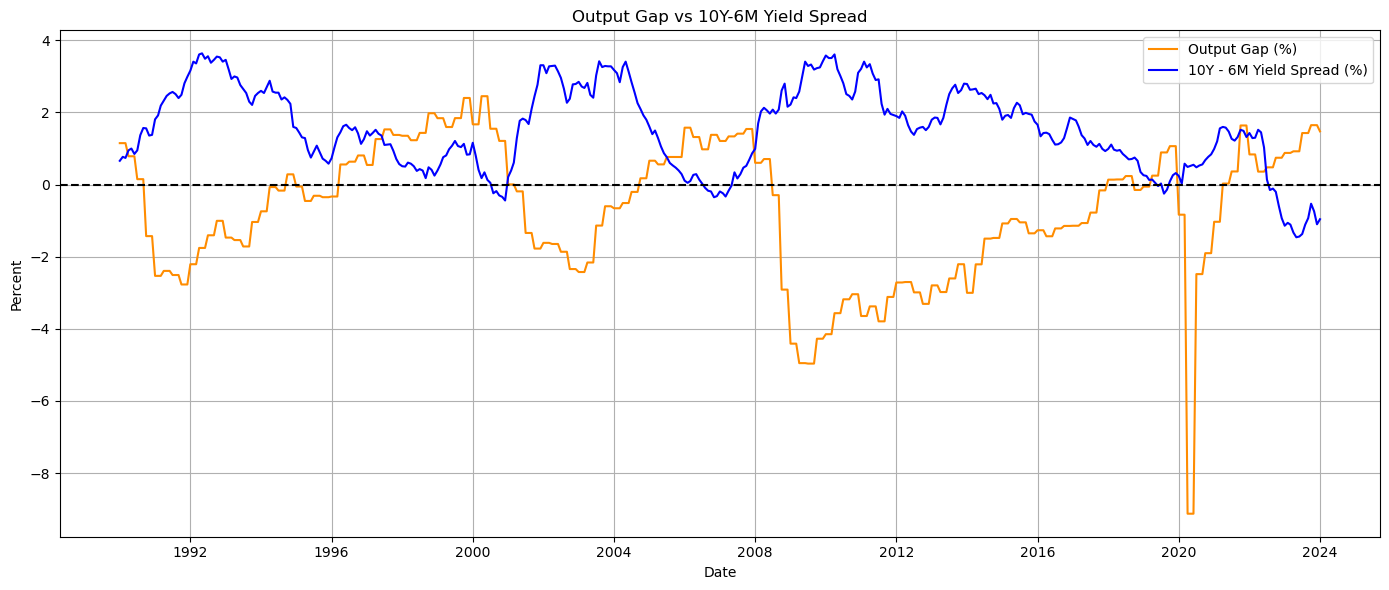

In [19]:

df_tb['Date'] = pd.to_datetime(df_tb['Date'])
df_tb = df_tb.set_index('Date')
df_plot = pd.concat([df_monthly[['Output_Gap']], df_tb[['10Y_minus_6M']]], axis=1)
df_plot = df_plot.dropna()

# plot
plt.figure(figsize=(14, 6))
plt.plot(df_plot.index, df_plot['Output_Gap'], label='Output Gap (%)', color='darkorange')
plt.plot(df_plot.index, df_plot['10Y_minus_6M'], label='10Y - 6M Yield Spread (%)', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Output Gap vs 10Y-6M Yield Spread")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df_tb['10Y_minus_6M_lag1'] = df_tb['10Y_minus_6M'].shift(1)
df_all['M2_YoY_lag1'] = df_all['M2_YoY'].shift(1)
df_all = df_all.merge(
    df_tb[['10Y_minus_6M', '10Y_minus_6M_lag1']],
    left_index=True, right_index=True, how='left'
)

[[ 48   3]
 [  0 111]]
              precision    recall  f1-score   support

           0      1.000     0.941     0.970        51
           1      0.974     1.000     0.987       111

    accuracy                          0.981       162
   macro avg      0.987     0.971     0.978       162
weighted avg      0.982     0.981     0.981       162



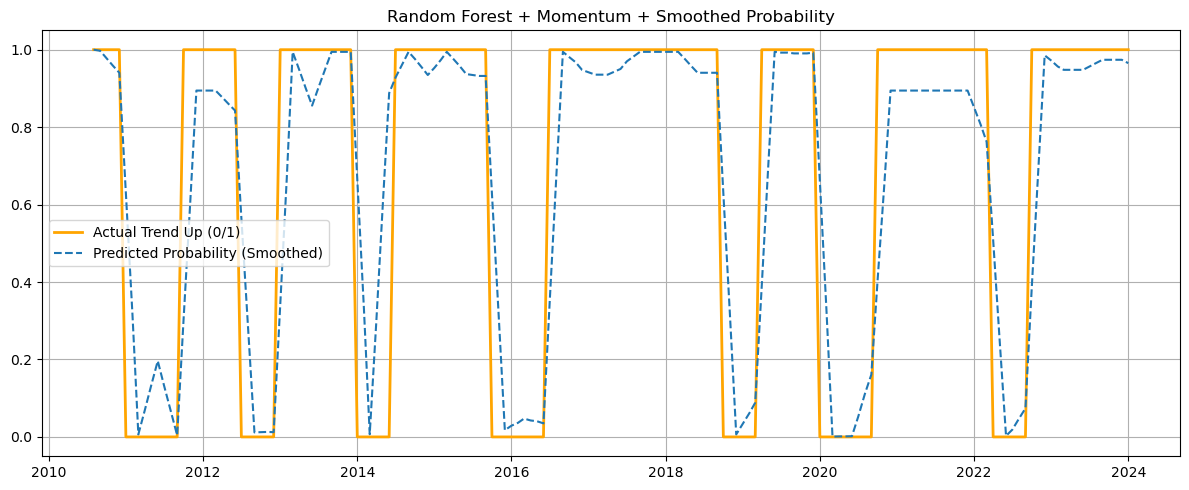

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
df_all['Gap_6M_before'] = df_all['Output_Gap'].shift(6)
df_all['Gap_6M_change'] = df_all['Output_Gap'] - df_all['Gap_6M_before']
df_all['Trend_Label'] = (df_all['Gap_6M_change'] > 0).astype(int)

df_all['OG_Mom_3M'] = df_all['Output_Gap'] - df_all['Output_Gap'].shift(3)
df_all['OG_Mom_6M'] = df_all['Output_Gap'] - df_all['Output_Gap'].shift(6)

X_cls = df_all[[
    '10Y_minus_6M_lag1',
    'M2_YoY_lag1',
    'OG_Mom_3M',
    'OG_Mom_6M'
]]
y_cls = df_all['Trend_Label']

# ==== date cleaning ====
df_cls = pd.concat([X_cls, y_cls], axis=1).dropna()
X_cls = df_cls.drop(columns='Trend_Label')
y_cls = df_cls['Trend_Label']

#split training/testing
split_idx = int(len(X_cls) * 0.6)
X_train, X_test = X_cls[:split_idx], X_cls[split_idx:]
y_train, y_test = y_cls[:split_idx], y_cls[split_idx:]
index_test = y_test.index

#training
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=3,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train, y_train)

#predicting
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
y_prob_smooth = pd.Series(y_prob, index=index_test).rolling(3, min_periods=1).mean()

# ==== output ====
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# ==== plot ====
plt.figure(figsize=(12, 5))
plt.plot(index_test, y_test.values, label='Actual Trend Up (0/1)', color='orange', linewidth=2)
plt.plot(index_test, y_prob_smooth, label='Predicted Probability (Smoothed)', linestyle='--')
plt.title('Random Forest + Momentum + Smoothed Probability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:

df_etf = pd.read_excel("ETF list.xlsx", header=[0, 1])
df_etf.columns = [' '.join(col).strip() for col in df_etf.columns]

df_etf.head()

Unnamed: 0_level_0 Dates  XLK US Equity PX_LAST  XLC US Equity PX_LAST  \
0                     32932                    NaN                    NaN   
1                     32962                    NaN                    NaN   
2                     32993                    NaN                    NaN   
3                     33024                    NaN                    NaN   
4                     33053                    NaN                    NaN   

   XLV US Equity PX_LAST  XLF US Equity PX_LAST  XLY US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLP US Equity PX_LAST  XLE US Equity PX_LAST  XLI US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLU US Equity PX_LAST  XLRE US Equity PX_LAST  XLB US Equity PX_LAST  
0                    NaN                     NaN                    NaN  
1                    NaN                     NaN                    NaN  
2                    NaN                     NaN                    NaN  
3                    NaN                     NaN                    NaN  
4                    NaN                     NaN                    NaN

In [23]:

df_etf.rename(columns={"Unnamed: 0_level_0 Dates": "Date"}, inplace=True)
df_etf.head()

Date  XLK US Equity PX_LAST  XLC US Equity PX_LAST  XLV US Equity PX_LAST  \
0  32932                    NaN                    NaN                    NaN   
1  32962                    NaN                    NaN                    NaN   
2  32993                    NaN                    NaN                    NaN   
3  33024                    NaN                    NaN                    NaN   
4  33053                    NaN                    NaN                    NaN   

   XLF US Equity PX_LAST  XLY US Equity PX_LAST  XLP US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLE US Equity PX_LAST  XLI US Equity PX_LAST  XLU US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLRE US Equity PX_LAST  XLB US Equity PX_LAST  
0                     NaN                    NaN  
1                     NaN                    NaN  
2                     NaN                    NaN  
3                     NaN                    NaN  
4                     NaN                    NaN

In [24]:
if pd.api.types.is_numeric_dtype(df_etf["Date"]):
    df_etf["Date"] = pd.to_datetime(df_etf["Date"], origin="1899-12-30", unit="D")
else:
    df_etf["Date"] = pd.to_datetime(df_etf["Date"], errors="coerce")

df_etf.head()

Date  XLK US Equity PX_LAST  XLC US Equity PX_LAST  \
0 1990-02-28                    NaN                    NaN   
1 1990-03-30                    NaN                    NaN   
2 1990-04-30                    NaN                    NaN   
3 1990-05-31                    NaN                    NaN   
4 1990-06-29                    NaN                    NaN   

   XLV US Equity PX_LAST  XLF US Equity PX_LAST  XLY US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLP US Equity PX_LAST  XLE US Equity PX_LAST  XLI US Equity PX_LAST  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   XLU US Equity PX_LAST  XLRE US Equity PX_LAST  XLB US Equity PX_LAST  
0                    NaN                     NaN                    NaN  
1                    NaN                     NaN                    NaN  
2                    NaN                     NaN                    NaN  
3                    NaN                     NaN                    NaN  
4                    NaN                     NaN                    NaN

In [25]:

df_etf = df_etf[df_etf["Date"] > pd.to_datetime("1998-12-31")]


print(df_etf.head())

          Date  XLK US Equity PX_LAST  XLC US Equity PX_LAST  \
107 1999-01-29                37.8125                    NaN   
108 1999-02-26                34.0625                    NaN   
109 1999-03-31                36.5938                    NaN   
110 1999-04-30                36.8125                    NaN   
111 1999-05-31                36.9375                    NaN   

     XLV US Equity PX_LAST  XLF US Equity PX_LAST  XLY US Equity PX_LAST  \
107                27.2500                19.3615                27.4688   
108                27.2813                19.6660                27.2969   
109                28.0000                20.2497                28.5938   
110                29.0000                21.6707                29.3438   
111                28.1094                20.3639                28.0156   

     XLP US Equity PX_LAST  XLE US Equity PX_LAST  XLI US Equity PX_LAST  \
107                26.7969                21.8125                24.2969   
108   

In [26]:
df_etf["Date"] = pd.to_datetime(df_etf["Date"], errors="coerce")

df_etf["Date"] = df_etf["Date"] + pd.offsets.MonthEnd(1)

df_etf["Date"] = df_etf["Date"].apply(lambda x: x.replace(day=1) if pd.notna(x) else x)

df_etf = df_etf[df_etf["Date"].notna()]

print(df_etf)

          Date  XLK US Equity PX_LAST  XLC US Equity PX_LAST  \
107 1999-01-01                37.8125                    NaN   
108 1999-02-01                34.0625                    NaN   
109 1999-04-01                36.5938                    NaN   
110 1999-05-01                36.8125                    NaN   
111 1999-06-01                36.9375                    NaN   
..         ...                    ...                    ...   
414 2024-08-01               220.3300                  87.32   
415 2024-10-01               225.7600                  90.40   
416 2024-11-01               222.2400                  92.04   
417 2024-11-01               233.7300                  98.40   
418 2025-01-01               232.5200                  96.81   

     XLV US Equity PX_LAST  XLF US Equity PX_LAST  XLY US Equity PX_LAST  \
107                27.2500                19.3615                27.4688   
108                27.2813                19.6660                27.2969   
109

In [27]:
df_etf = df_etf[df_etf["Date"].notna()]

df_etf.set_index("Date", inplace=True)

df_etf = df_etf[df_etf.index.isin(df_monthly.index)]

combined = df_monthly.join(df_etf, how="inner")
print(combined)

            Actual_GDP  Potential_GDP  Unemployment_Rate       CPI  Recession  \
1999-01-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-02-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-04-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-05-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-06-01   13426.748    13215.68444                4.3  0.727273        0.0   
...                ...            ...                ...       ...        ...   
2023-09-01   22780.933    22459.74068                3.5  0.190752        0.0   
2023-09-01   22780.933    22459.74068                3.5  0.190752        0.0   
2023-11-01   22960.600    22588.18459                3.9 -0.038338        0.0   
2023-12-01   22960.600    22588.18459                3.9 -0.038338        0.0   
2023-12-01   22960.600    22588.18459                3.9 -0.038338        0.0   

            Output_Gap  Inv

In [28]:
# 1. split Output Gap 
positive_gap = combined[combined["Output_Gap"] > 0]
negative_gap = combined[combined["Output_Gap"] < 0]

# ËÆ°ÁÆó Sharpe RatioÔºàÂπ≥ÂùáÊî∂Áõä / Ê†áÂáÜÂ∑ÆÔºâ
sharpe_pos = positive_gap.iloc[:, 3:].pct_change().mean() / positive_gap.iloc[:, 3:].pct_change().std()
sharpe_neg = negative_gap.iloc[:, 3:].pct_change().mean() / negative_gap.iloc[:, 3:].pct_change().std()

# ÂèñÂâç3ÂêçË°®Áé∞ÊúÄÂ•Ω ETF
top_sharpe_pos = sharpe_pos.sort_values(ascending=False).head(3)
top_sharpe_neg = sharpe_neg.sort_values(ascending=False).head(3)

# ÊâìÂç∞ÁªìÊûú
print("üìà Output Gap ‰∏∫Ê≠£Êó∂ Sharpe Ë°®Áé∞ÊúÄÂ•ΩÁöÑ ETFÔºö")
print(top_sharpe_pos)

print("\nüìâ Output Gap ‰∏∫Ë¥üÊó∂ Sharpe Ë°®Áé∞ÊúÄÂ•ΩÁöÑ ETFÔºö")
print(top_sharpe_neg)

üìà Output Gap ‰∏∫Ê≠£Êó∂ Sharpe Ë°®Áé∞ÊúÄÂ•ΩÁöÑ ETFÔºö
XLE US Equity PX_LAST    0.187436
XLB US Equity PX_LAST    0.178485
XLI US Equity PX_LAST    0.155436
dtype: float64

üìâ Output Gap ‰∏∫Ë¥üÊó∂ Sharpe Ë°®Áé∞ÊúÄÂ•ΩÁöÑ ETFÔºö
XLC US Equity PX_LAST    0.330106
XLY US Equity PX_LAST    0.208117
XLV US Equity PX_LAST    0.201429
dtype: float64


In [29]:
import numpy as np
window = 6  
etf_cols = [col for col in combined.columns if col.endswith("PX_LAST")]


labels = []
for i in range(len(combined) - window + 1):
    gap_seg = combined['Output_Gap'].iloc[i:i+window]
    if gap_seg.is_monotonic_increasing:
        labels.append(1)
    elif gap_seg.is_monotonic_decreasing:
        labels.append(-1)
    else:
        labels.append(0)
combined['Gap_Trend_6M'] = [np.nan]*(window-1) + labels

# ===== calculate monthly return =====
returns = combined[etf_cols].pct_change()
combined[etf_cols] = returns

# ===== average return during upward/downward trend =====
rising = combined[combined['Gap_Trend_6M'] == 1]
falling = combined[combined['Gap_Trend_6M'] == -1]

rising_perf = rising[etf_cols].mean().sort_values(ascending=False)
falling_perf = falling[etf_cols].mean().sort_values(ascending=False)

# ===== output =====
print(" Top 3 performer during expasion ETFÔºö")
print(rising_perf.head(3))

print(" Top 3 performer during recession ETFÔºö")
print(falling_perf.head(3))

 Top 3 performer during expasion ETFÔºö
XLK US Equity PX_LAST    0.018180
XLC US Equity PX_LAST    0.015596
XLY US Equity PX_LAST    0.014038
dtype: float64
 Top 3 performer during recession ETFÔºö
XLV US Equity PX_LAST   -0.000633
XLY US Equity PX_LAST   -0.000964
XLB US Equity PX_LAST   -0.002183
dtype: float64


In [30]:
print(combined.columns)

Index(['Actual_GDP', 'Potential_GDP', 'Unemployment_Rate', 'CPI', 'Recession',
       'Output_Gap', 'Inverted_Unrate', 'XLK US Equity PX_LAST',
       'XLC US Equity PX_LAST', 'XLV US Equity PX_LAST',
       'XLF US Equity PX_LAST', 'XLY US Equity PX_LAST',
       'XLP US Equity PX_LAST', 'XLE US Equity PX_LAST',
       'XLI US Equity PX_LAST', 'XLU US Equity PX_LAST',
       'XLRE US Equity PX_LAST', 'XLB US Equity PX_LAST', 'Gap_Trend_6M'],
      dtype='object')


In [31]:
combined["Smoothed_Proba"] = y_prob_smooth
print(combined)

            Actual_GDP  Potential_GDP  Unemployment_Rate       CPI  Recession  \
1999-01-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-02-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-04-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-05-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-06-01   13426.748    13215.68444                4.3  0.727273        0.0   
...                ...            ...                ...       ...        ...   
2023-09-01   22780.933    22459.74068                3.5  0.190752        0.0   
2023-09-01   22780.933    22459.74068                3.5  0.190752        0.0   
2023-11-01   22960.600    22588.18459                3.9 -0.038338        0.0   
2023-12-01   22960.600    22588.18459                3.9 -0.038338        0.0   
2023-12-01   22960.600    22588.18459                3.9 -0.038338        0.0   

            Output_Gap  Inv

In [32]:
print(combined.head())

            Actual_GDP  Potential_GDP  Unemployment_Rate       CPI  Recession  \
1999-01-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-02-01   13315.597    13074.75048                4.3  0.244051        0.0   
1999-04-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-05-01   13426.748    13215.68444                4.3  0.727273        0.0   
1999-06-01   13426.748    13215.68444                4.3  0.727273        0.0   

            Output_Gap  Inverted_Unrate  XLK US Equity PX_LAST  \
1999-01-01    1.842074             -4.3                    NaN   
1999-02-01    1.842074             -4.3              -0.099174   
1999-04-01    1.597069             -4.3               0.074313   
1999-05-01    1.597069             -4.3               0.005976   
1999-06-01    1.597069             -4.3               0.003396   

            XLC US Equity PX_LAST  XLV US Equity PX_LAST  \
1999-01-01                    NaN                    NaN